In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('C:/Users/Jameel/Downloads/WHO-COVID-19-global-data.csv') #we have to put .csv at last
print(df.head(10))

  Date_reported Country_code      Country WHO_region  New_cases  \
0    2020-01-05           AF  Afghanistan       EMRO        NaN   
1    2020-01-12           AF  Afghanistan       EMRO        NaN   
2    2020-01-19           AF  Afghanistan       EMRO        NaN   
3    2020-01-26           AF  Afghanistan       EMRO        NaN   
4    2020-02-02           AF  Afghanistan       EMRO        NaN   
5    2020-02-09           AF  Afghanistan       EMRO        NaN   
6    2020-02-16           AF  Afghanistan       EMRO        NaN   
7    2020-02-23           AF  Afghanistan       EMRO        NaN   
8    2020-03-01           AF  Afghanistan       EMRO        1.0   
9    2020-03-08           AF  Afghanistan       EMRO        NaN   

   Cumulative_cases  New_deaths  Cumulative_deaths  
0                 0         NaN                  0  
1                 0         NaN                  0  
2                 0         NaN                  0  
3                 0         NaN                  0

In [5]:
print("\nRemoving Country_code column from data set :\n")
df2=df.drop(['Country_code'],axis=1) #axis=1 means its column and inplace = true means make changes in orginal dataset
print(df2.head(10))                  #if we dont use inplace=true then write df=df.drop...



Removing Country_code column from data set :

  Date_reported      Country WHO_region  New_cases  Cumulative_cases  \
0    2020-01-05  Afghanistan       EMRO        NaN                 0   
1    2020-01-12  Afghanistan       EMRO        NaN                 0   
2    2020-01-19  Afghanistan       EMRO        NaN                 0   
3    2020-01-26  Afghanistan       EMRO        NaN                 0   
4    2020-02-02  Afghanistan       EMRO        NaN                 0   
5    2020-02-09  Afghanistan       EMRO        NaN                 0   
6    2020-02-16  Afghanistan       EMRO        NaN                 0   
7    2020-02-23  Afghanistan       EMRO        NaN                 0   
8    2020-03-01  Afghanistan       EMRO        1.0                 1   
9    2020-03-08  Afghanistan       EMRO        NaN                 1   

   New_deaths  Cumulative_deaths  
0         NaN                  0  
1         NaN                  0  
2         NaN                  0  
3         NaN       

In [7]:
print("\nRemoving WHO_region column from data set :\n")
df2.drop(['WHO_region'],axis=1,inplace=True)
print(df2.head(10))


Removing WHO_region column from data set :

  Date_reported      Country  New_cases  Cumulative_cases  New_deaths  \
0    2020-01-05  Afghanistan        NaN                 0         NaN   
1    2020-01-12  Afghanistan        NaN                 0         NaN   
2    2020-01-19  Afghanistan        NaN                 0         NaN   
3    2020-01-26  Afghanistan        NaN                 0         NaN   
4    2020-02-02  Afghanistan        NaN                 0         NaN   
5    2020-02-09  Afghanistan        NaN                 0         NaN   
6    2020-02-16  Afghanistan        NaN                 0         NaN   
7    2020-02-23  Afghanistan        NaN                 0         NaN   
8    2020-03-01  Afghanistan        1.0                 1         0.0   
9    2020-03-08  Afghanistan        NaN                 1         NaN   

   Cumulative_deaths  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
5            

In [9]:
countries=df2['Country'].unique()
print("\nThe description of total data is :\n")
print(df2.describe())


The description of total data is :

          New_cases  Cumulative_cases    New_deaths  Cumulative_deaths
count  4.510700e+04      6.048000e+04  45246.000000       6.048000e+04
mean   1.722026e+04      1.855559e+06    156.333510       2.042230e+04
std    2.519661e+05      7.986225e+06    913.654828       8.309639e+04
min   -6.507900e+04      0.000000e+00  -3432.000000       0.000000e+00
25%    1.400000e+01      5.010750e+03      0.000000       3.100000e+01
50%    2.180000e+02      4.823650e+04      1.000000       6.110000e+02
75%    2.799000e+03      5.544725e+05     28.000000       7.216500e+03
max    4.047548e+07      1.034368e+08  47687.000000       1.206141e+06


In [11]:
print(f"\nThe Total Number of countries in the data set are :",len(countries))


The Total Number of countries in the data set are : 240



The graphs of whole World is :
 


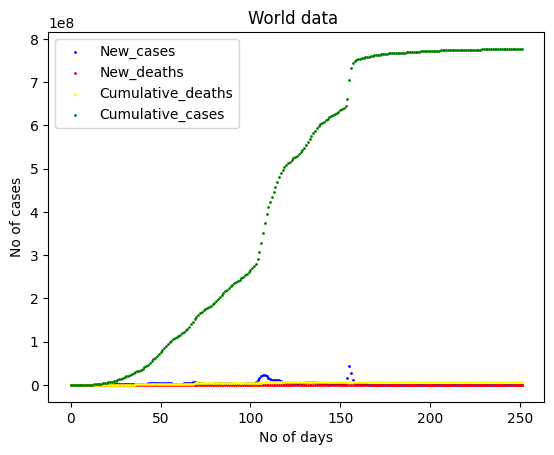

In [13]:
print("\nThe graphs of whole World is :\n ")
df3 = df2.groupby('Date_reported', as_index=False)[['New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']].sum()
c=df3
plt.scatter(np.arange(0,len(c)),c['New_cases'],color='blue',label='New_cases',s=1) #s is used to decrease thickness of graph lines
plt.scatter(np.arange(0,len(c)),c['New_deaths'],color='red',label='New_deaths',s=1)
plt.scatter(np.arange(0,len(c)),c['Cumulative_deaths'],color='yellow',label='Cumulative_deaths',s=1)
plt.scatter(np.arange(0,len(c)),c['Cumulative_cases'],color='green',label='Cumulative_cases',s=1)
plt.title("World data ")
plt.xlabel("No of days")
plt.ylabel("No of cases")
plt.legend()
plt.show()


The graphs of all countries are :



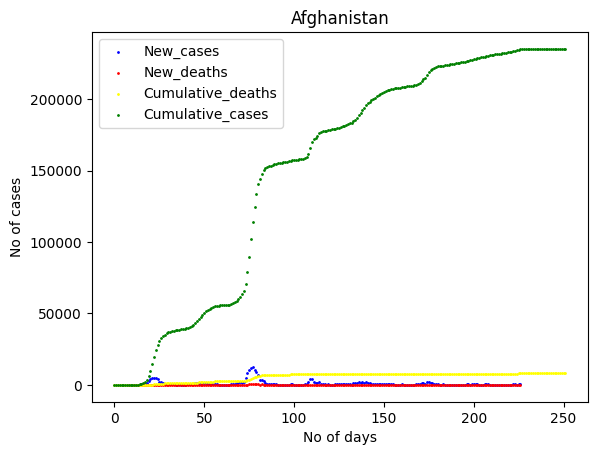

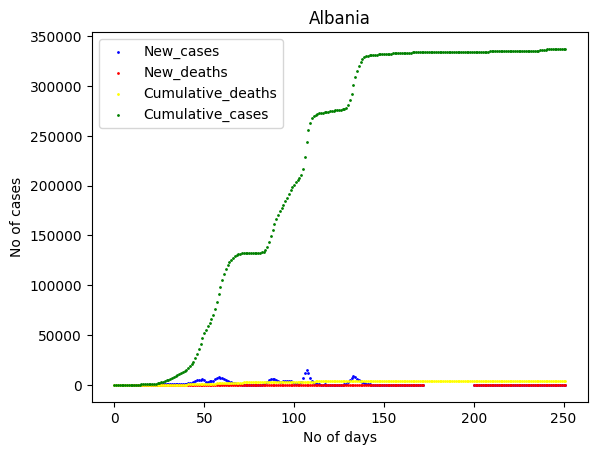

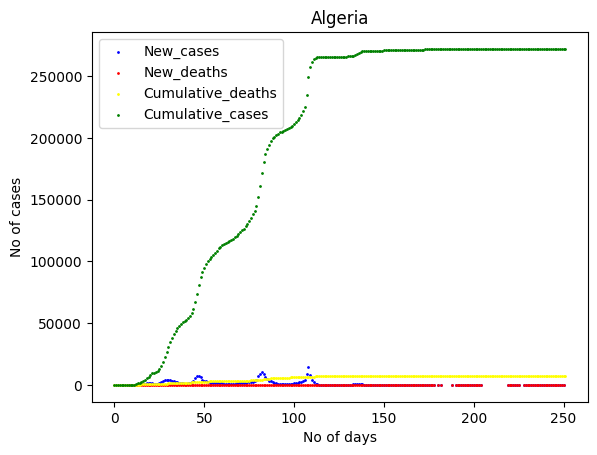

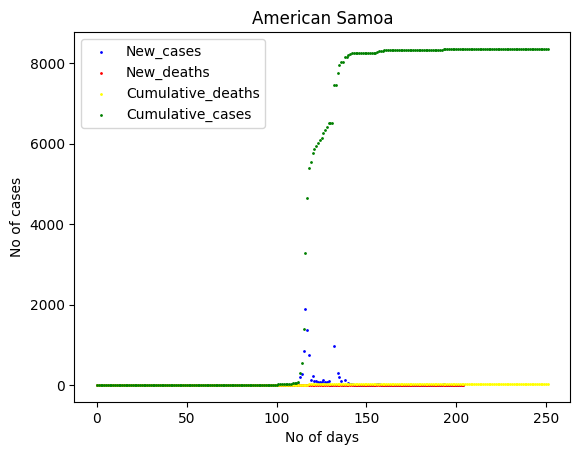

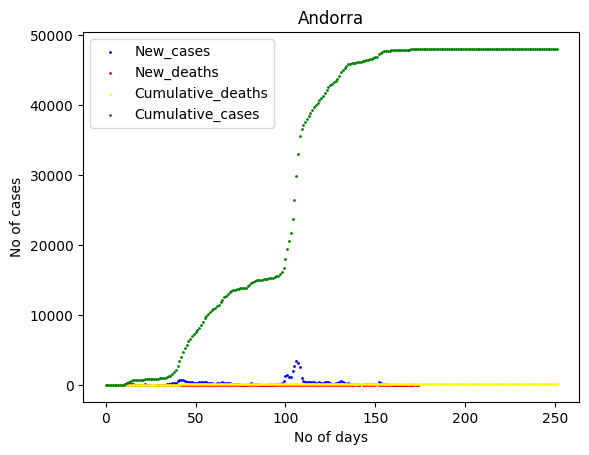

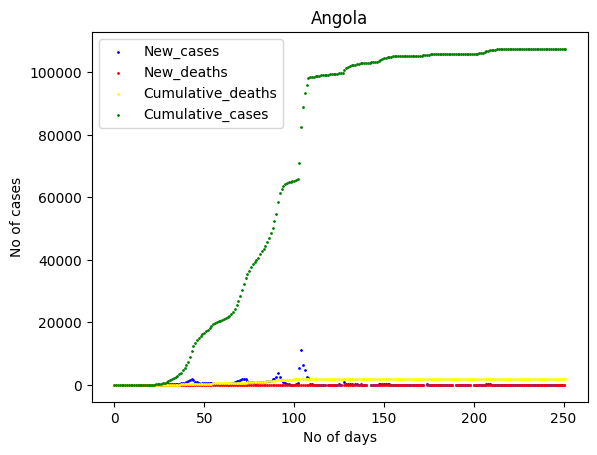

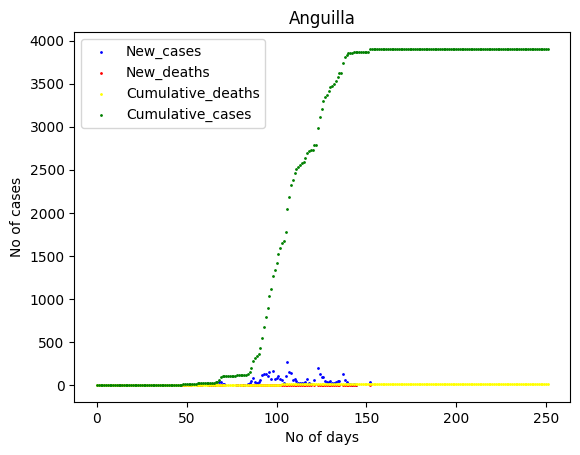

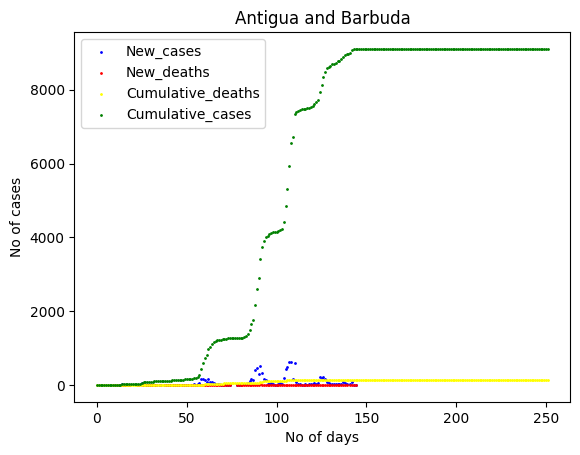

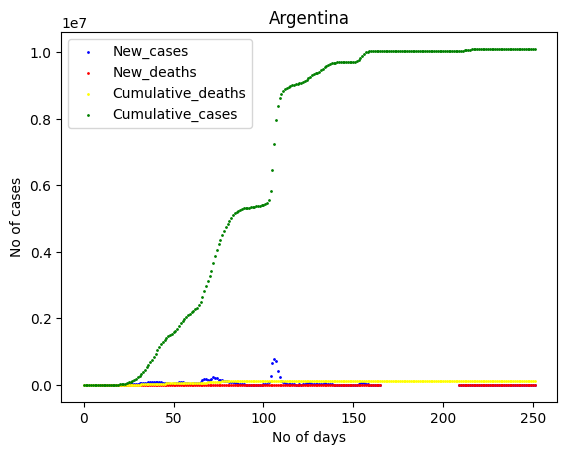

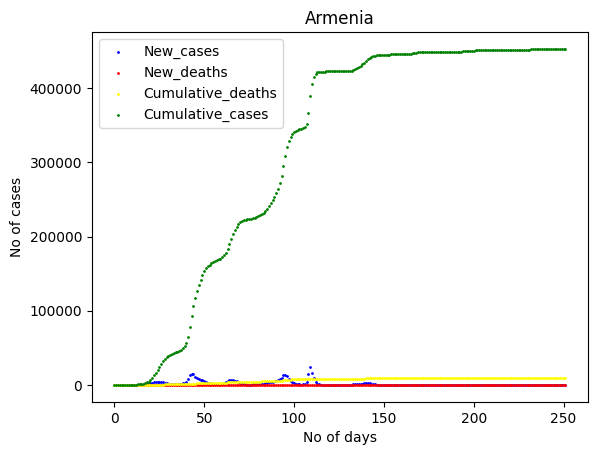

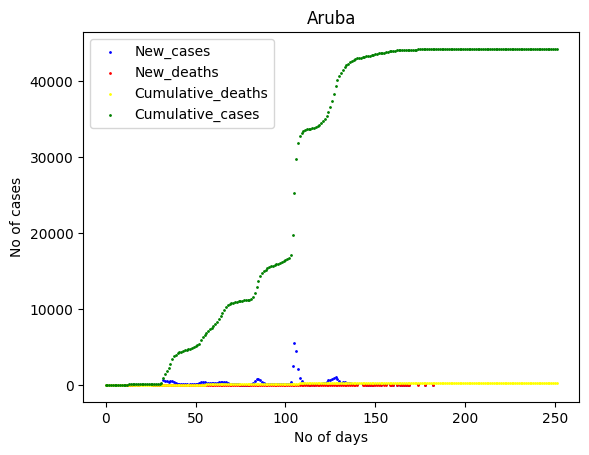

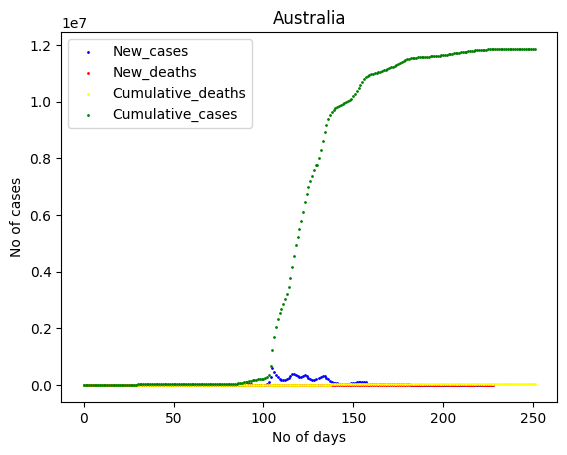

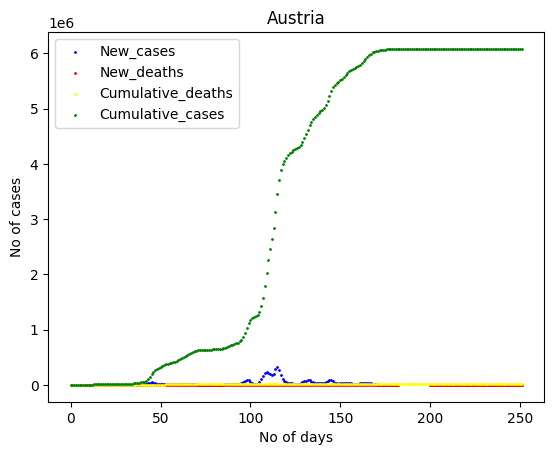

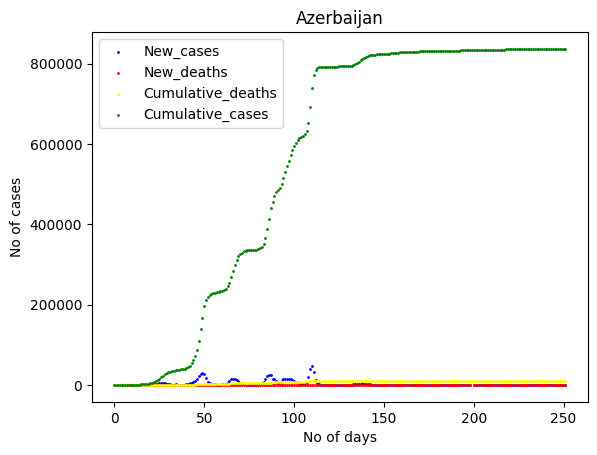

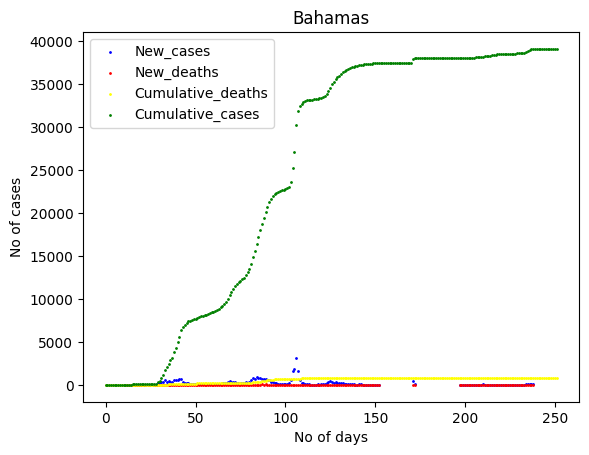

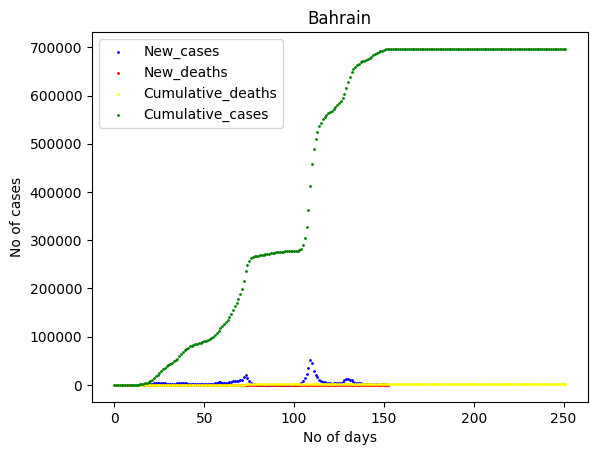

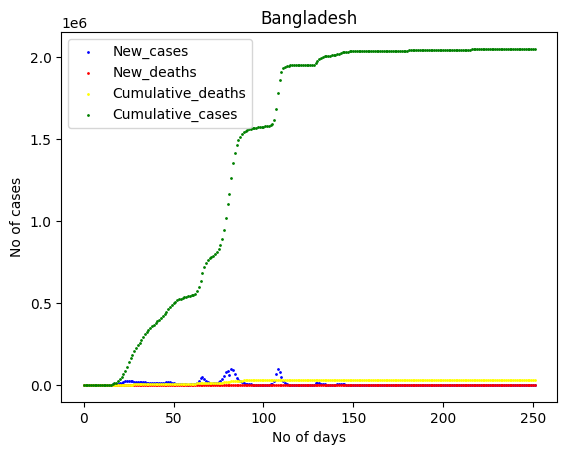

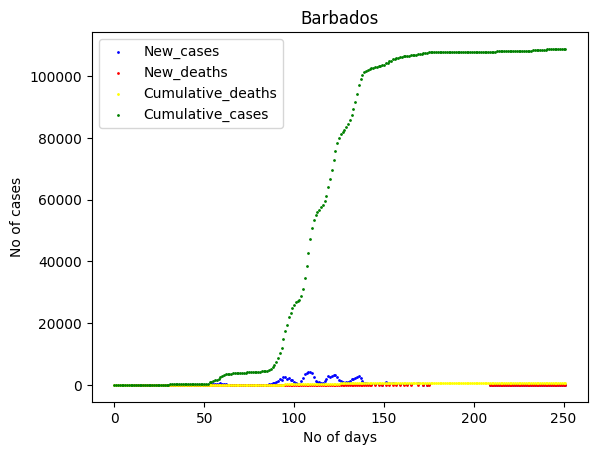

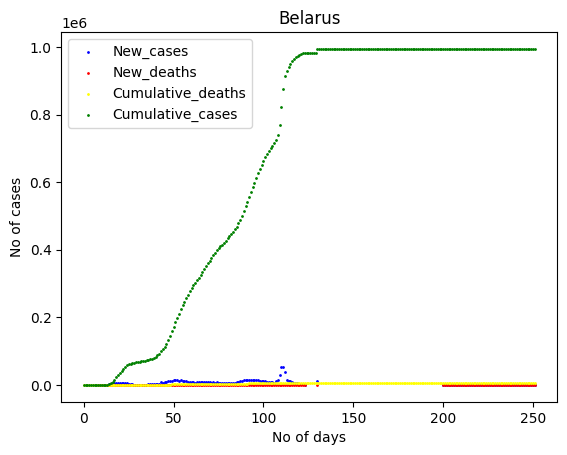

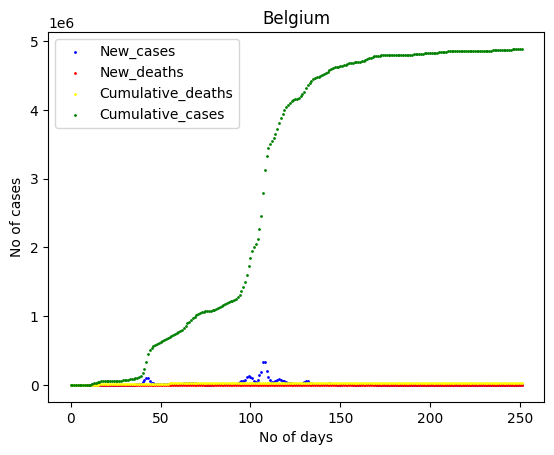

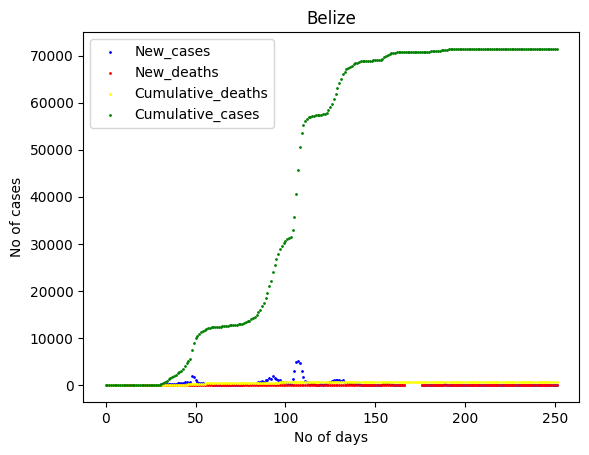

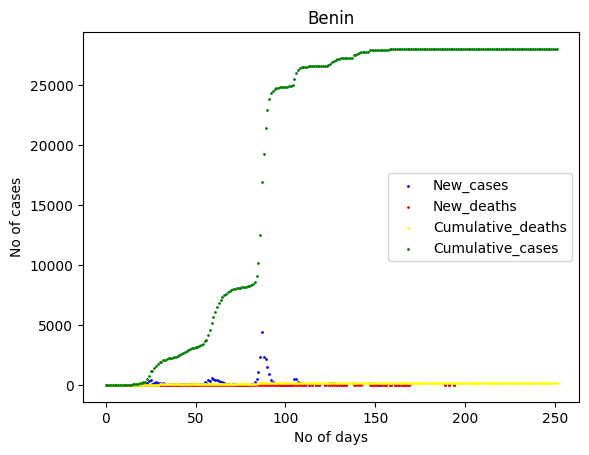

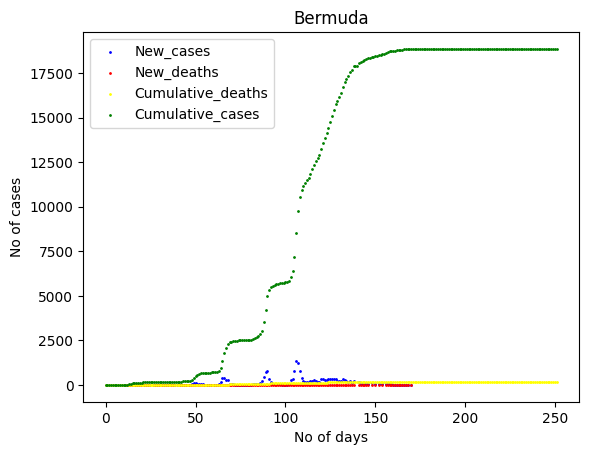

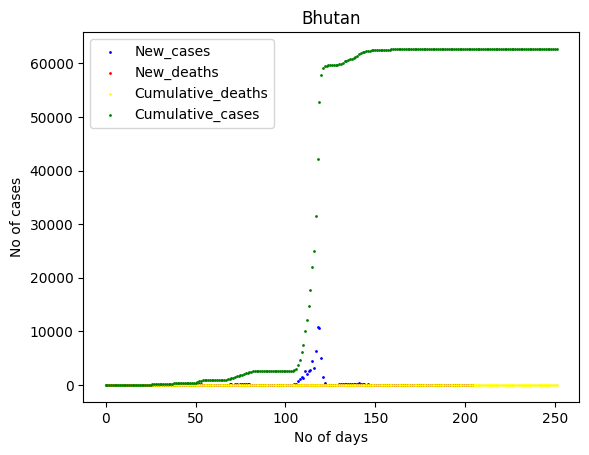

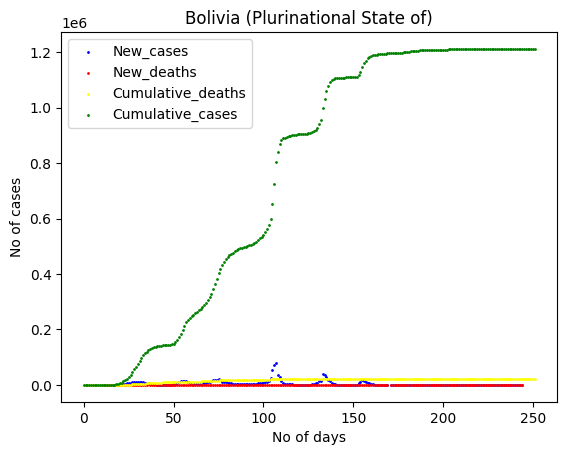

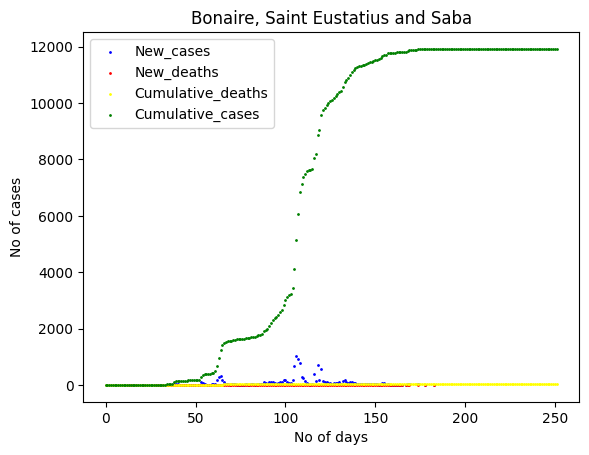

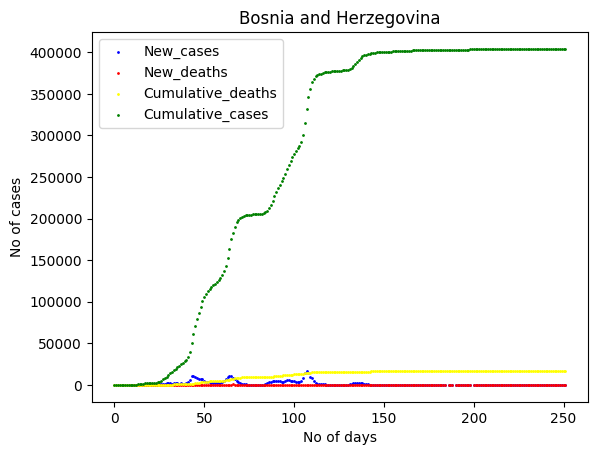

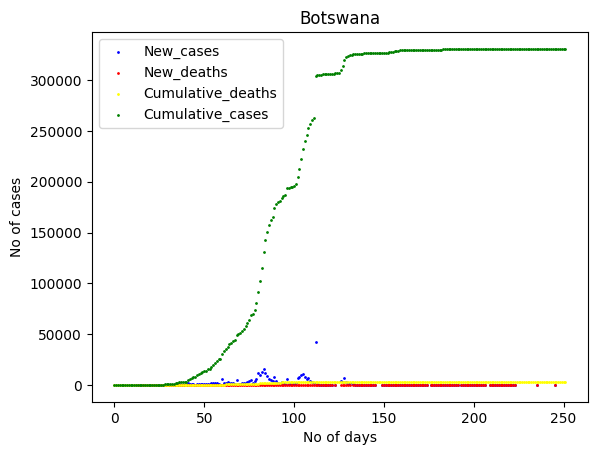

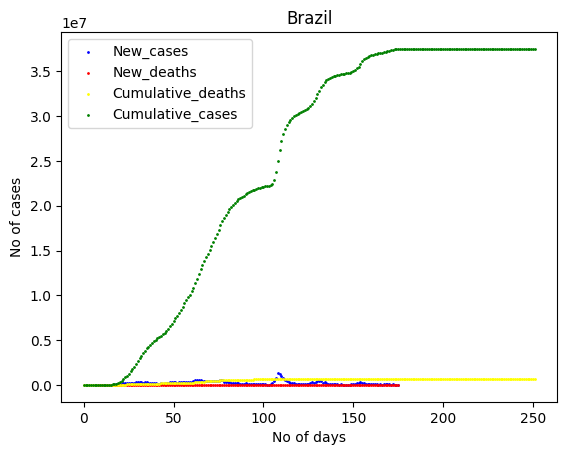

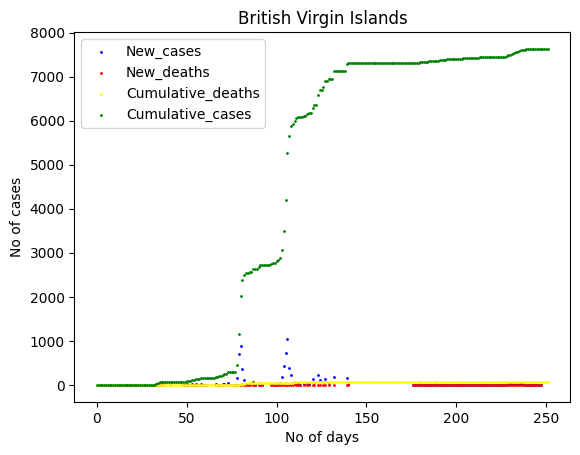

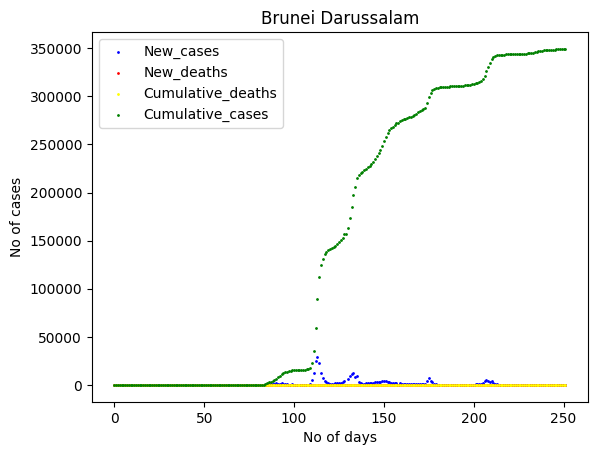

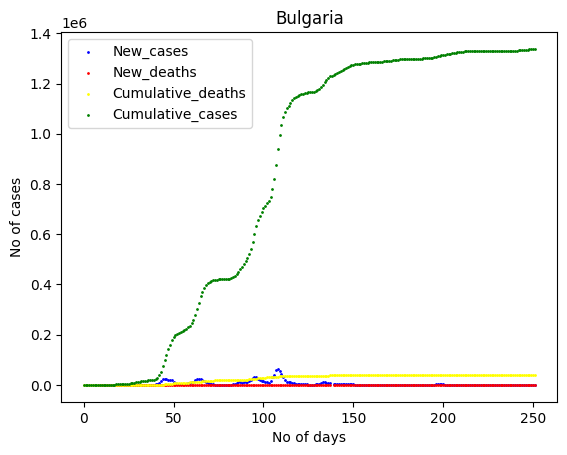

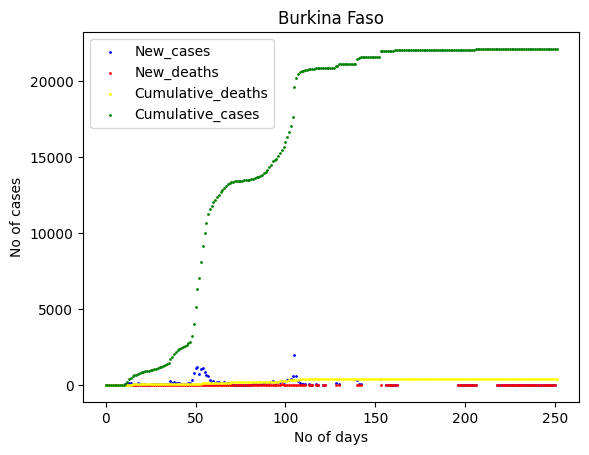

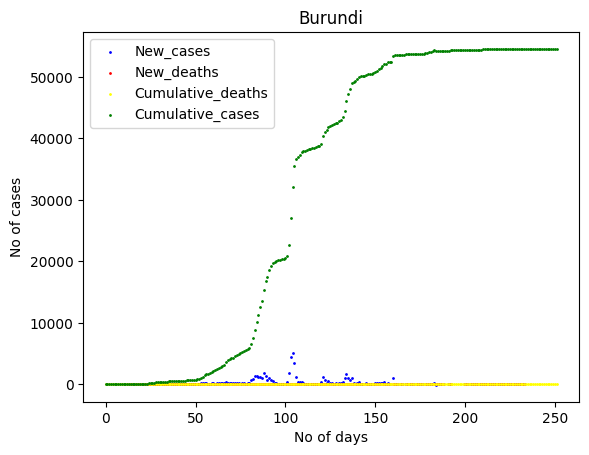

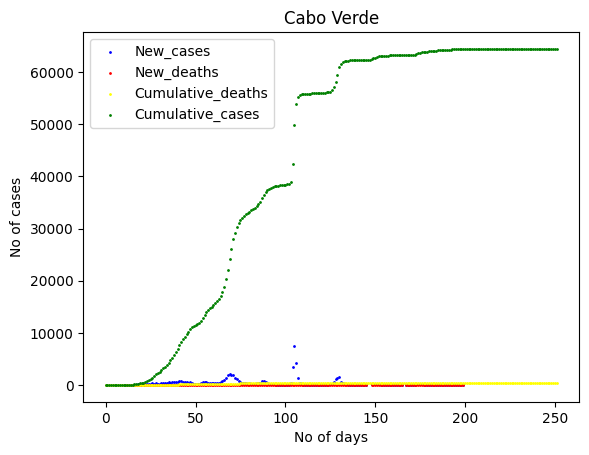

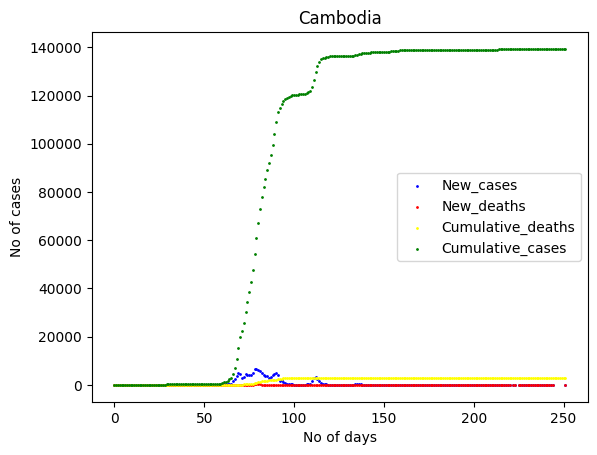

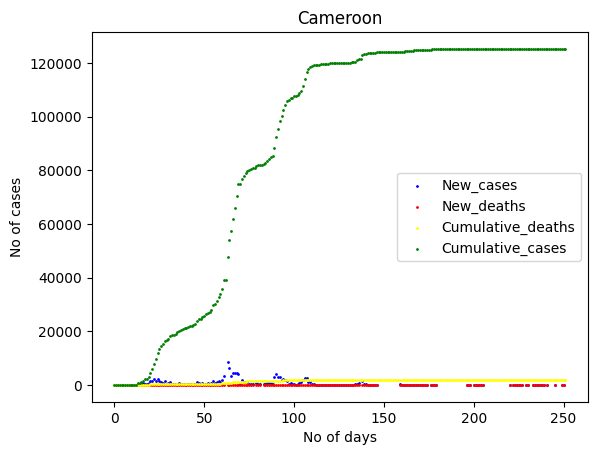

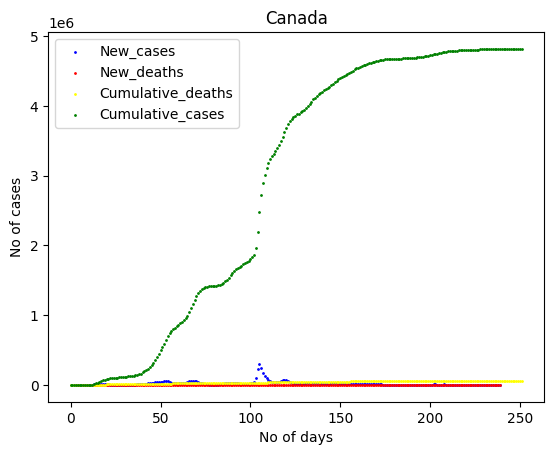

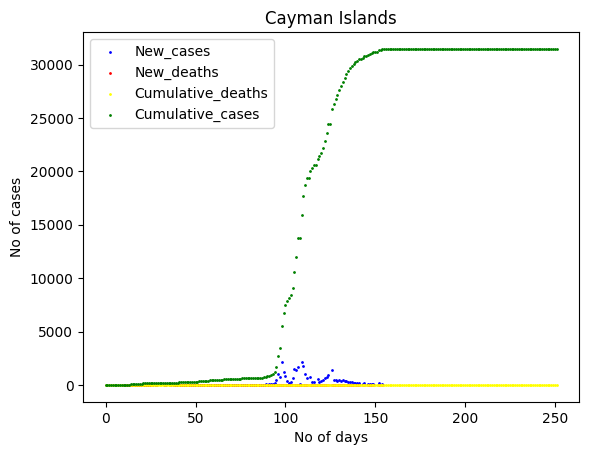

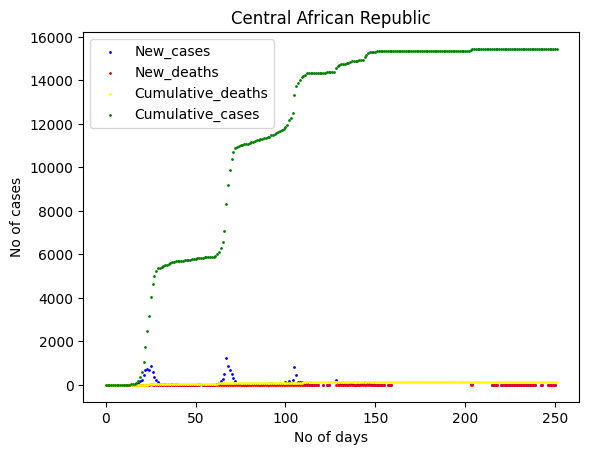

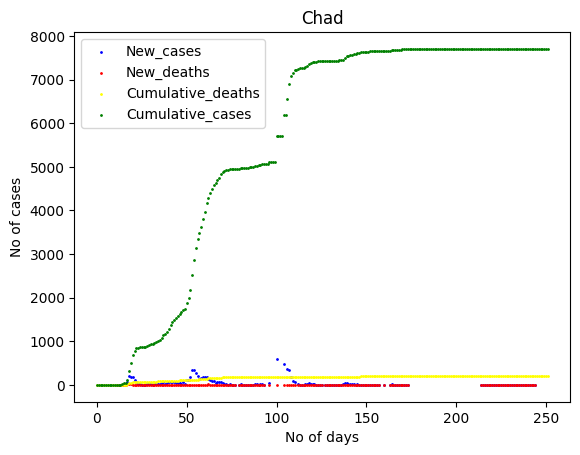

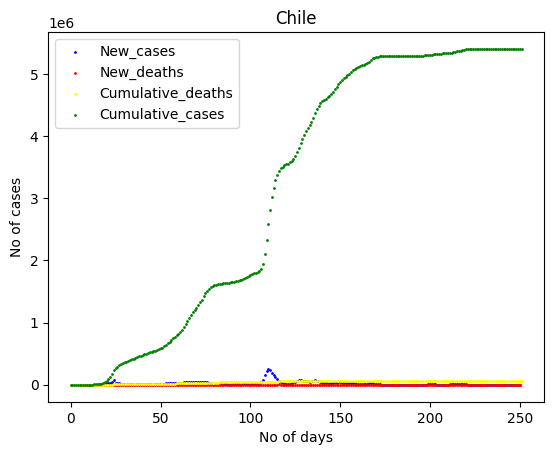

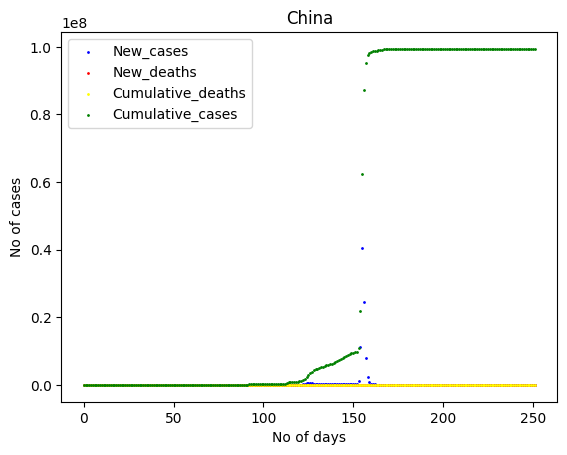

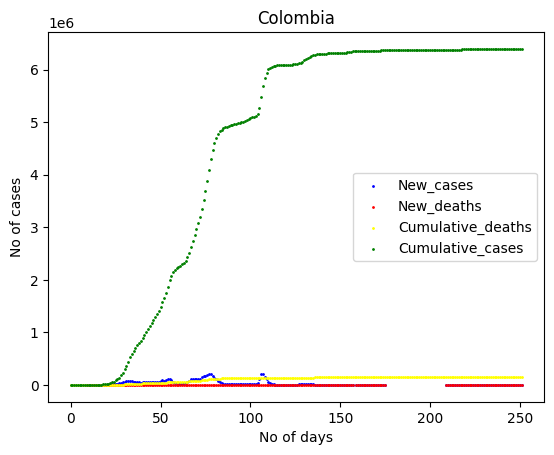

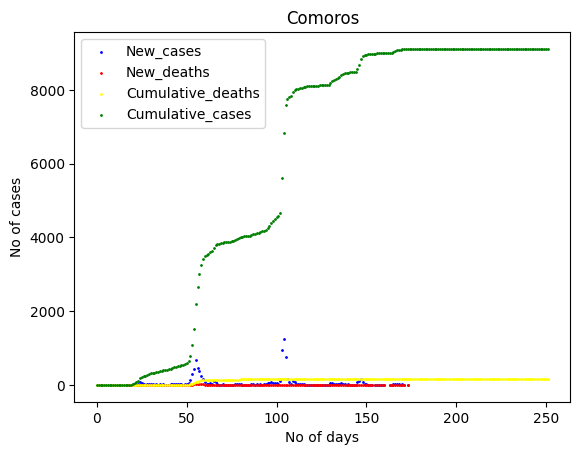

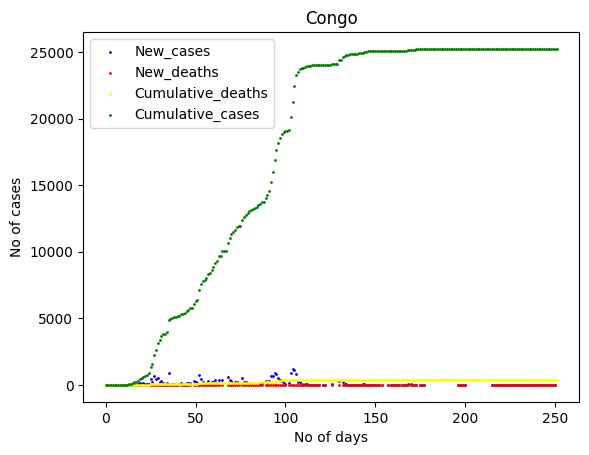

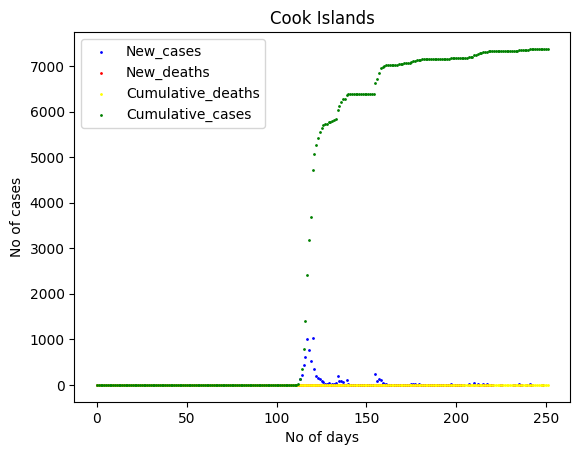

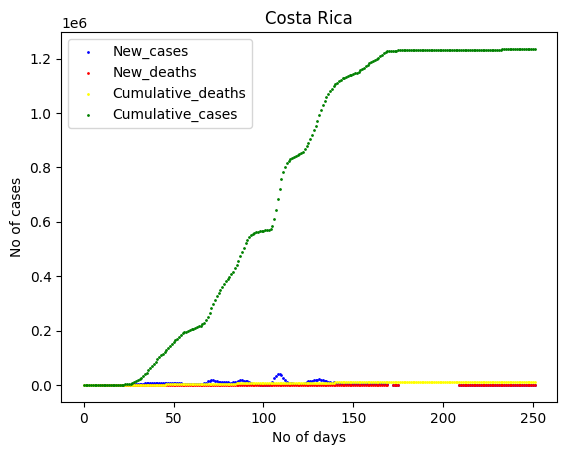

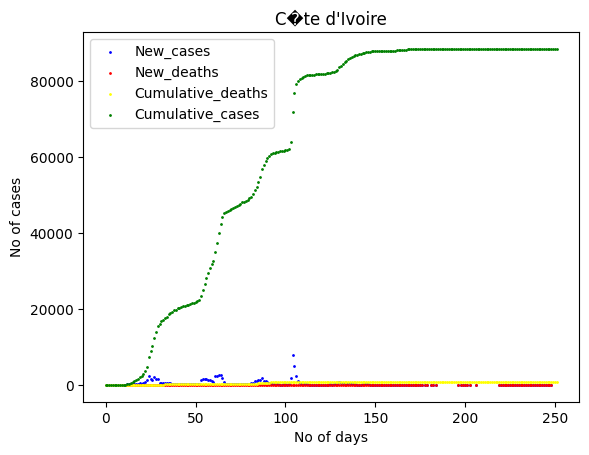

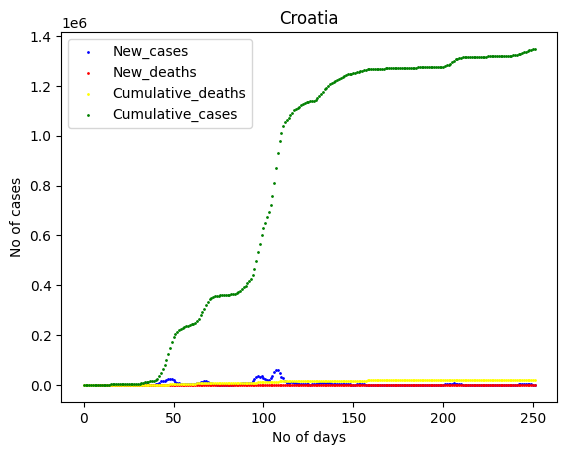

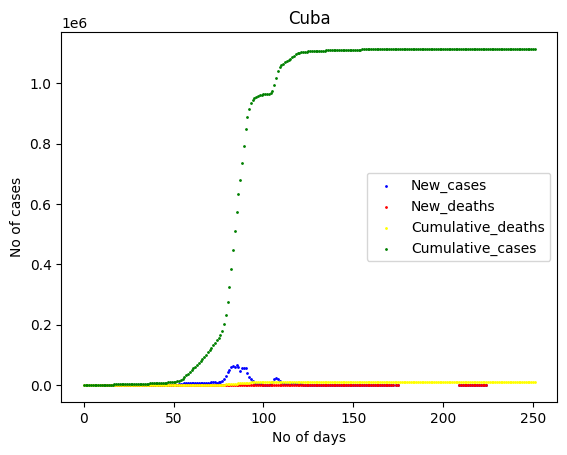

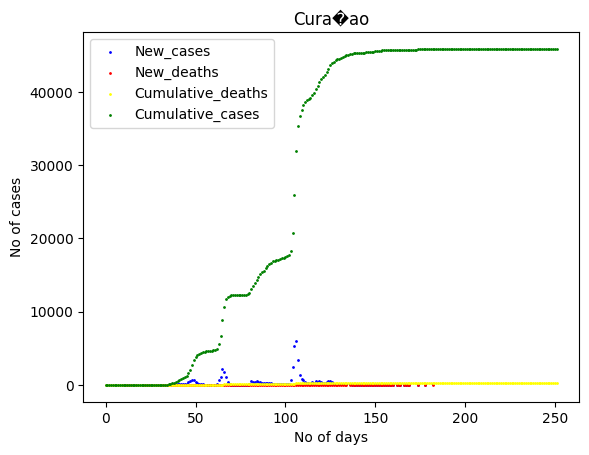

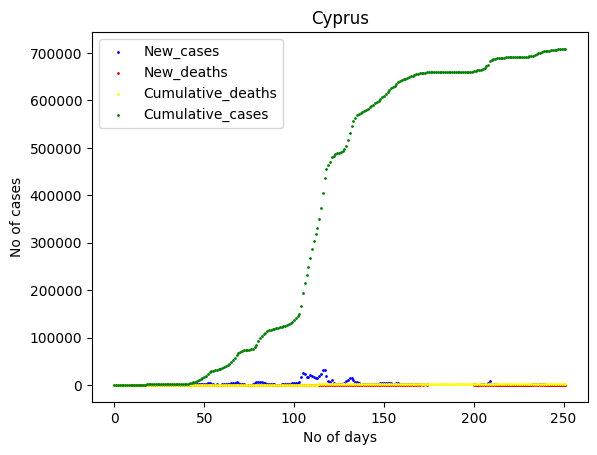

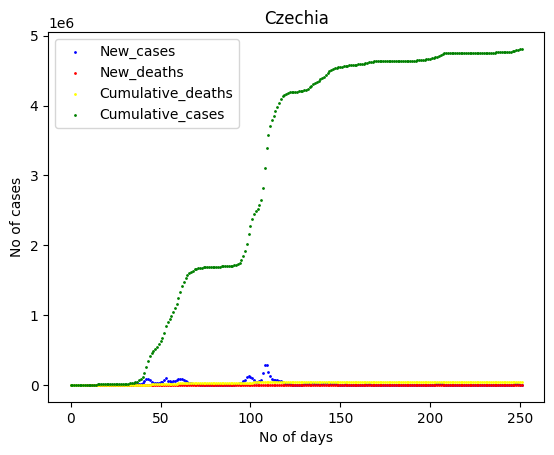

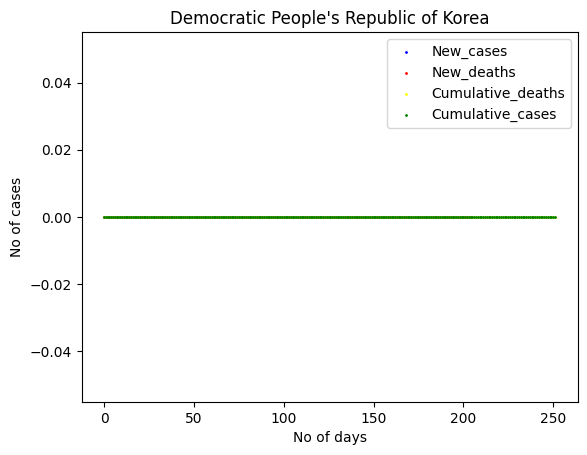

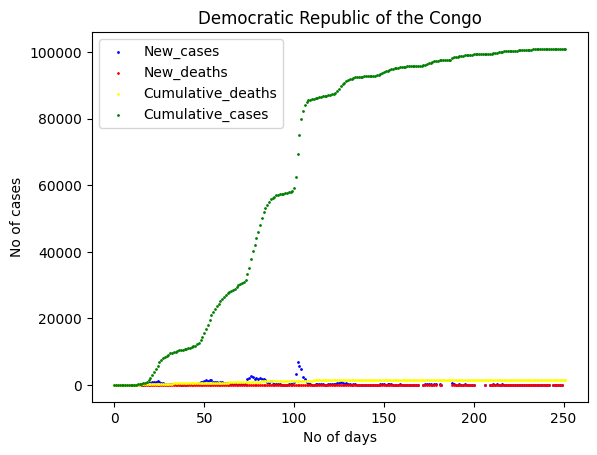

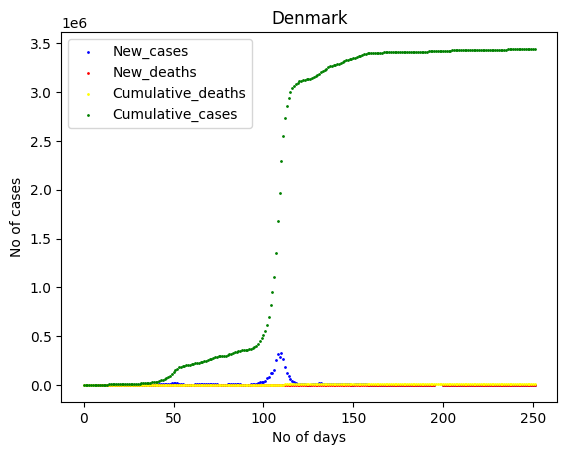

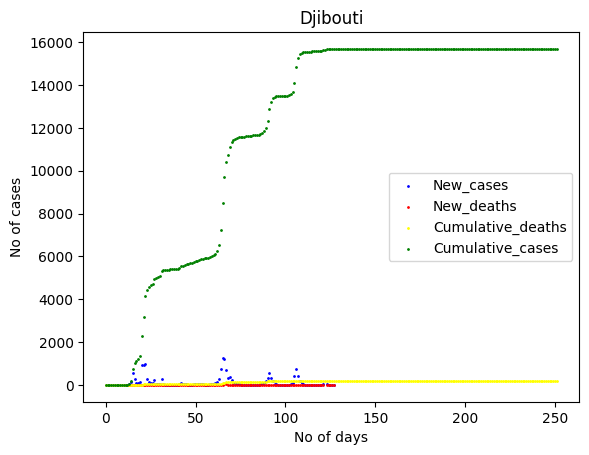

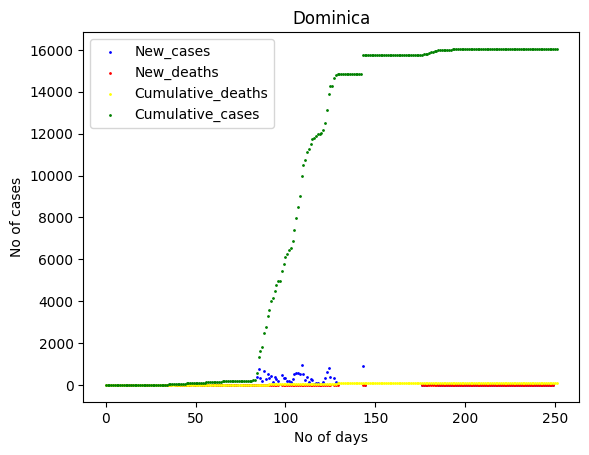

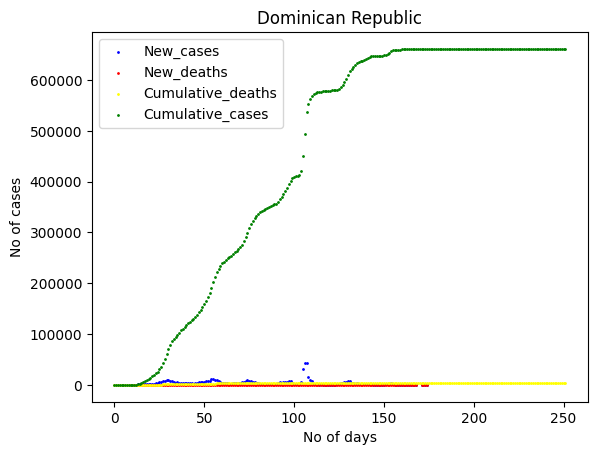

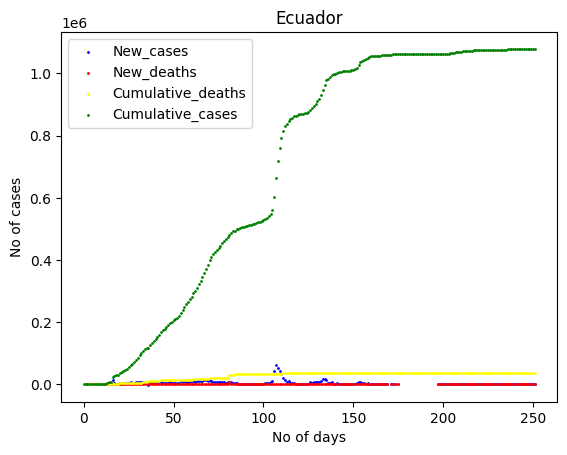

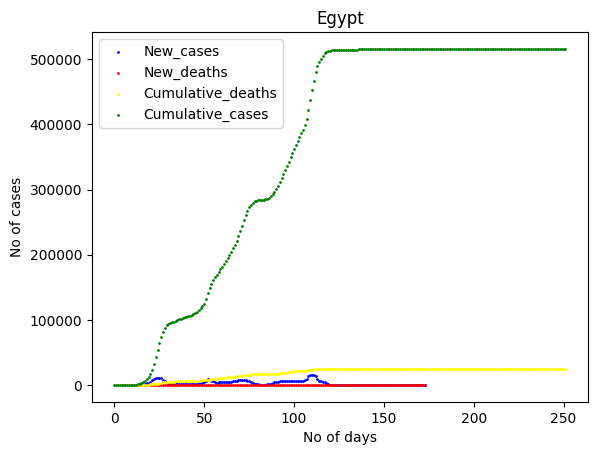

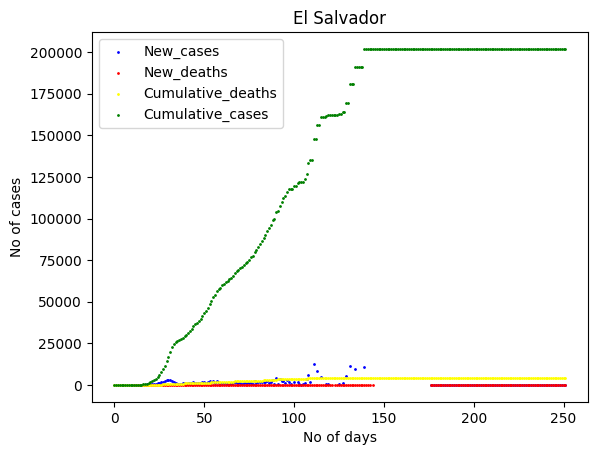

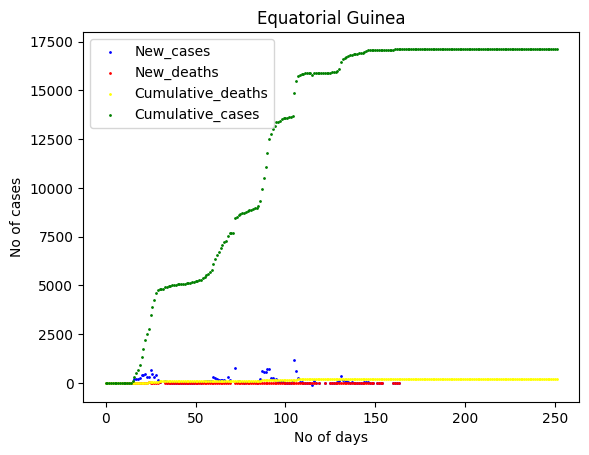

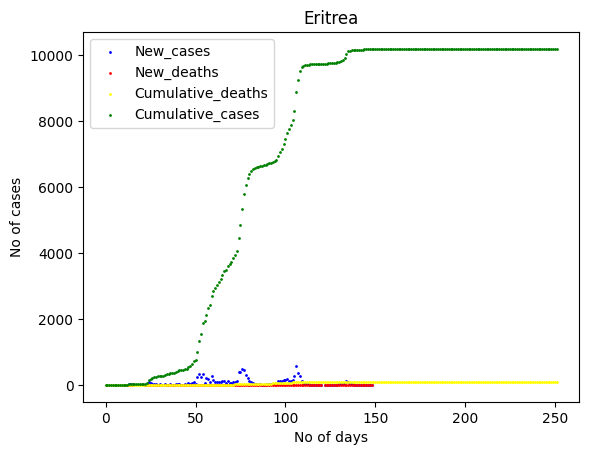

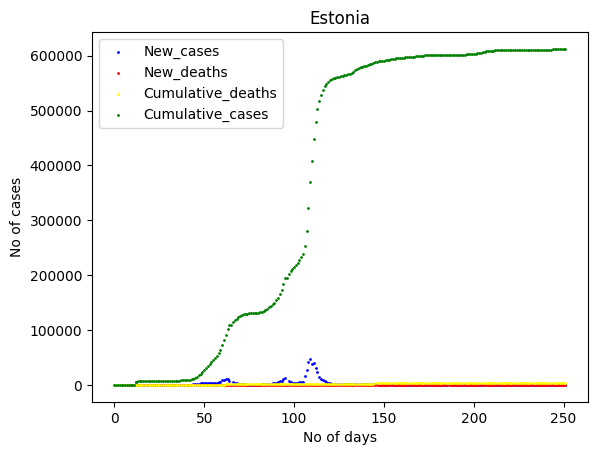

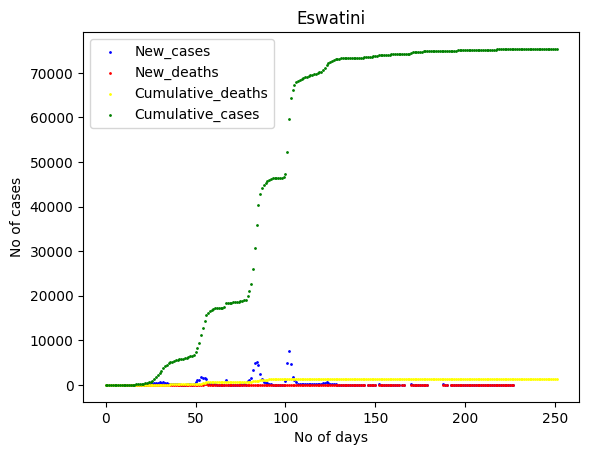

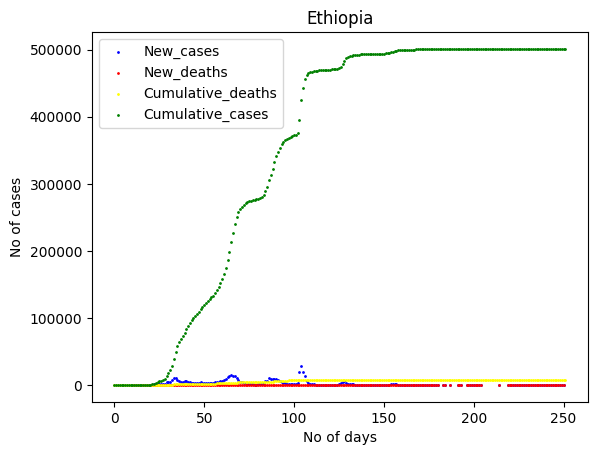

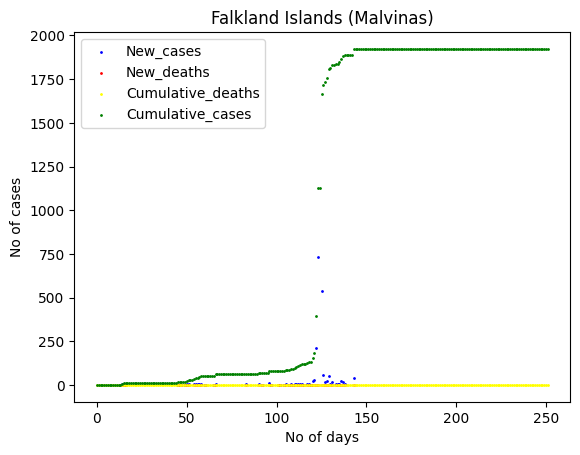

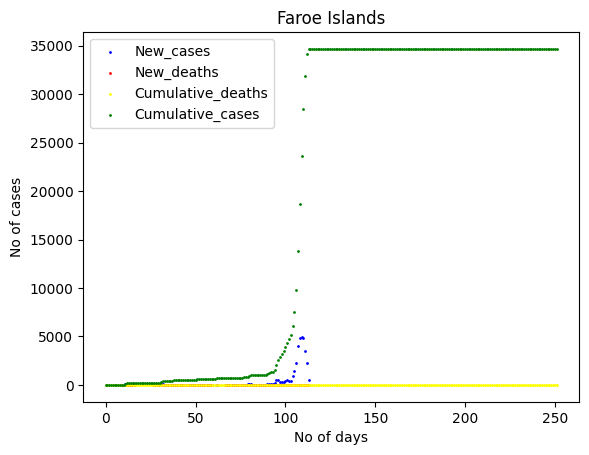

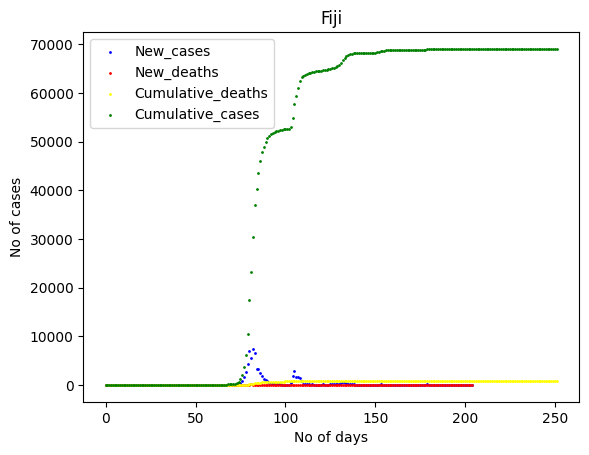

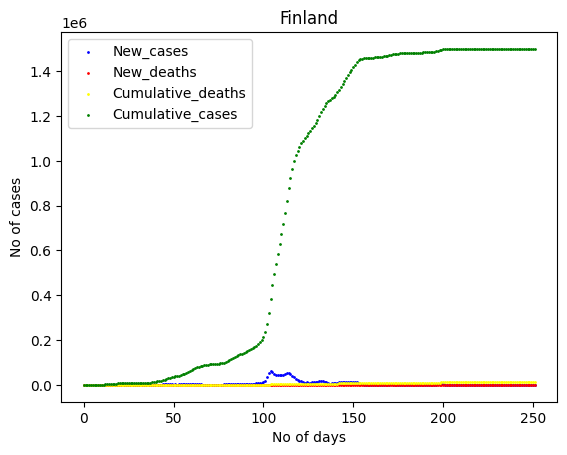

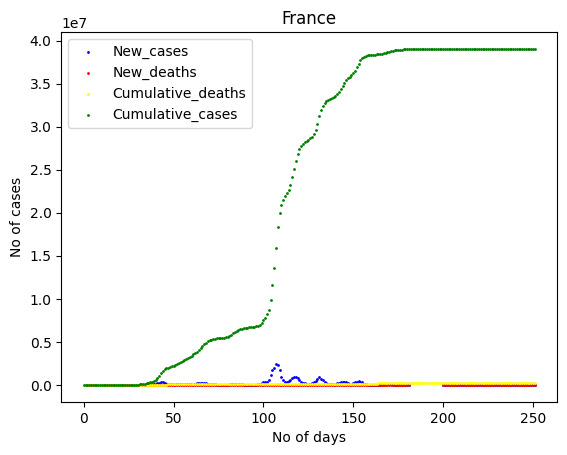

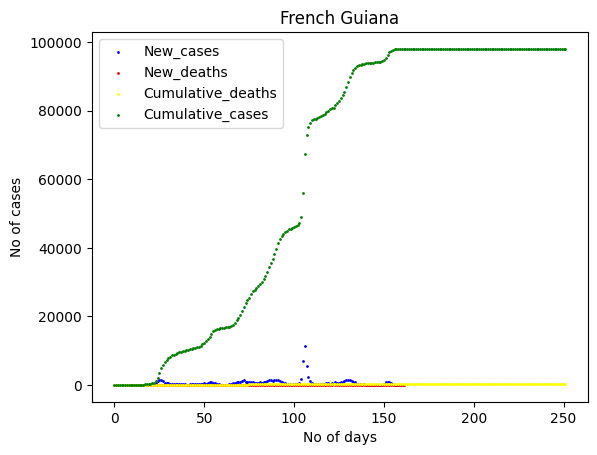

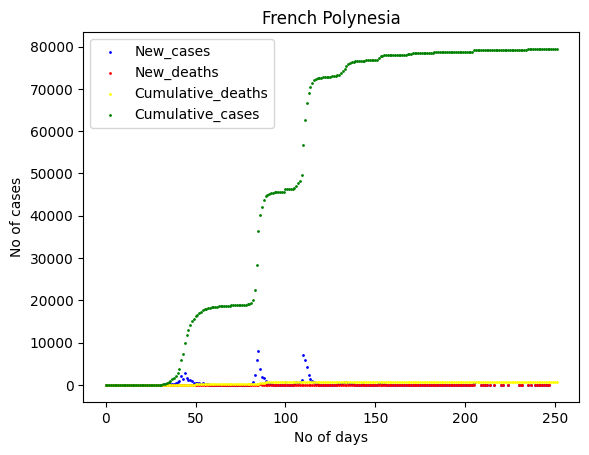

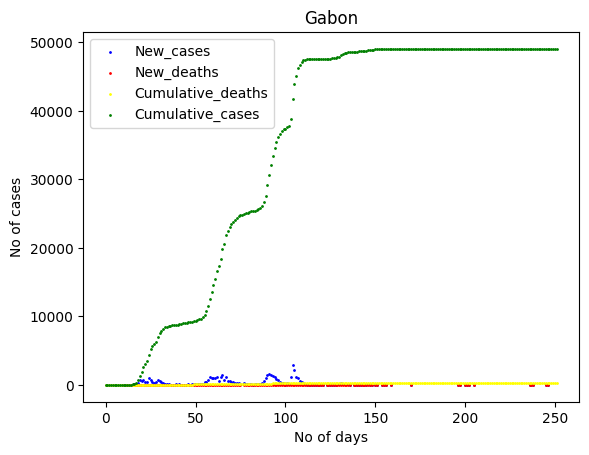

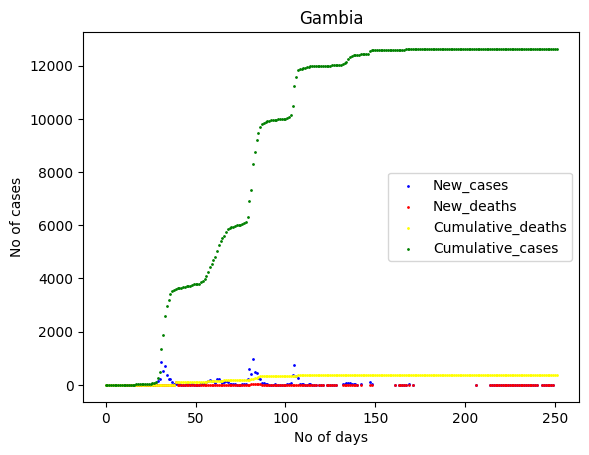

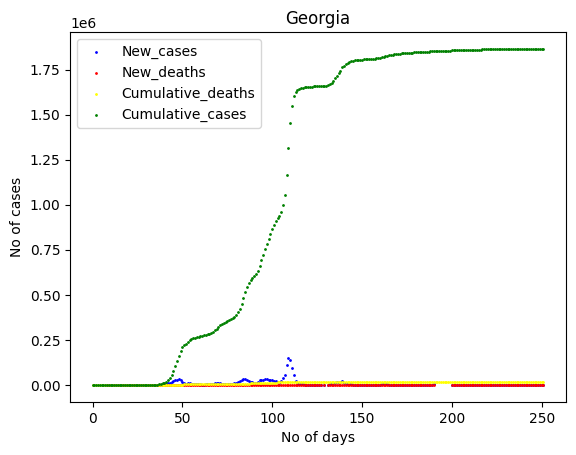

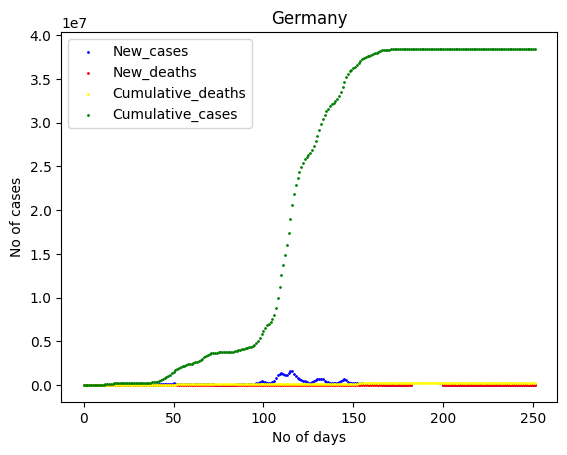

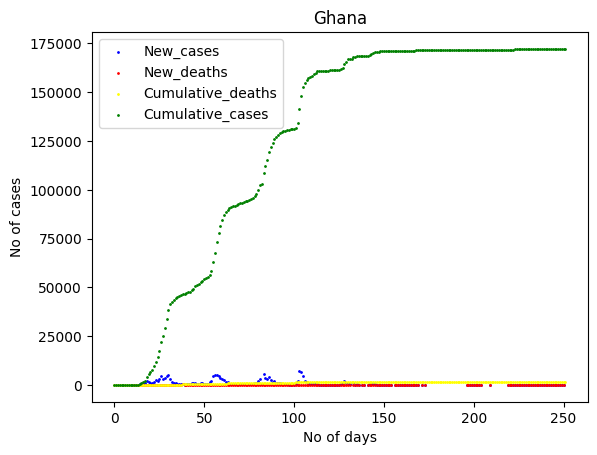

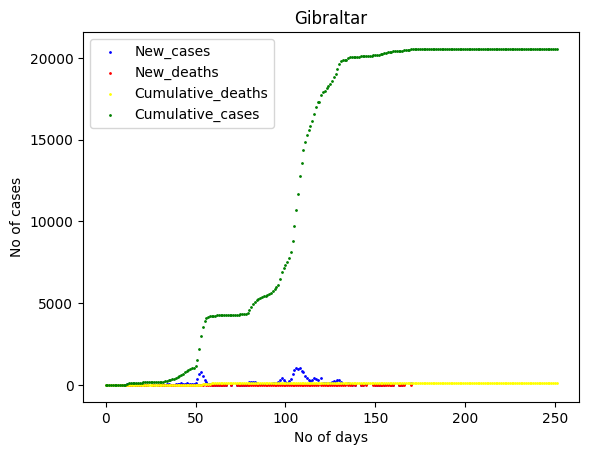

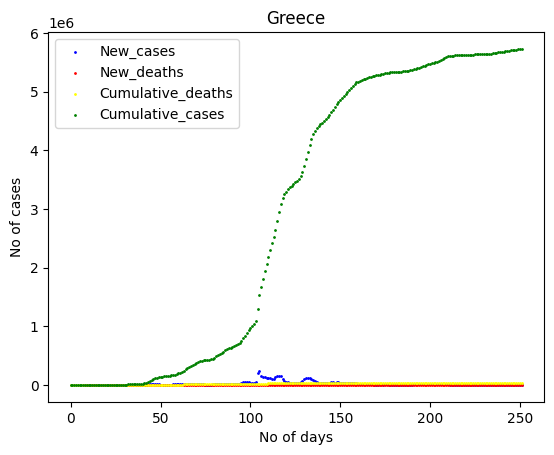

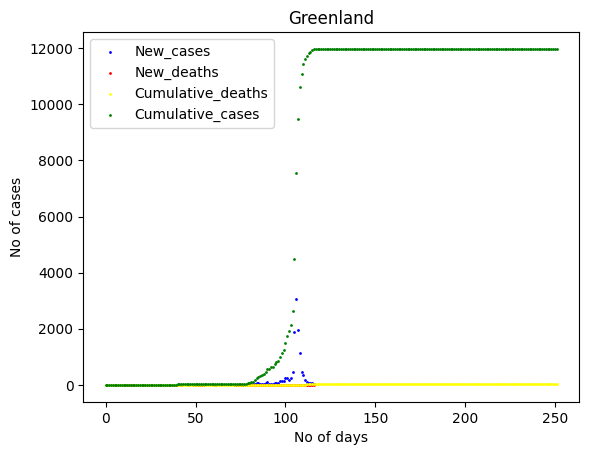

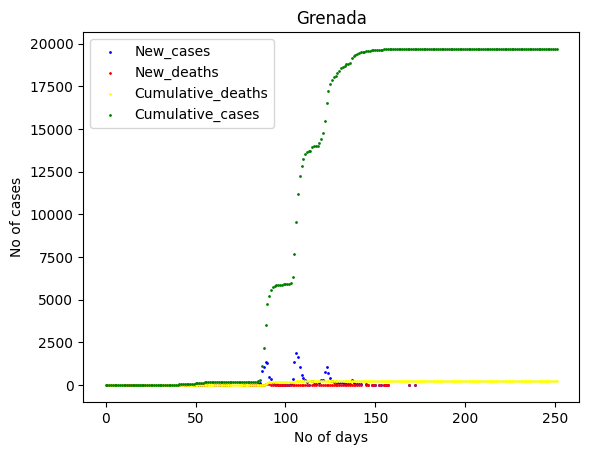

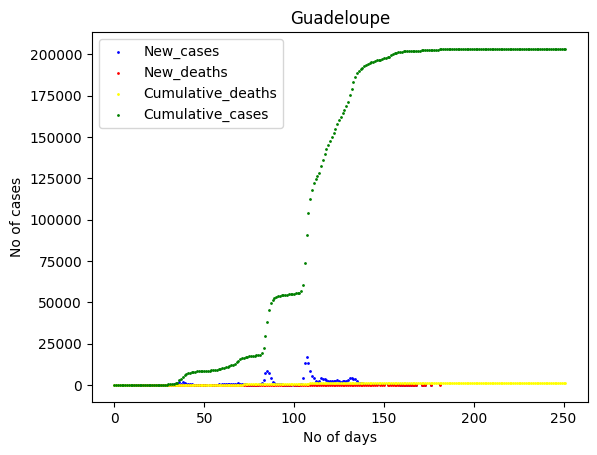

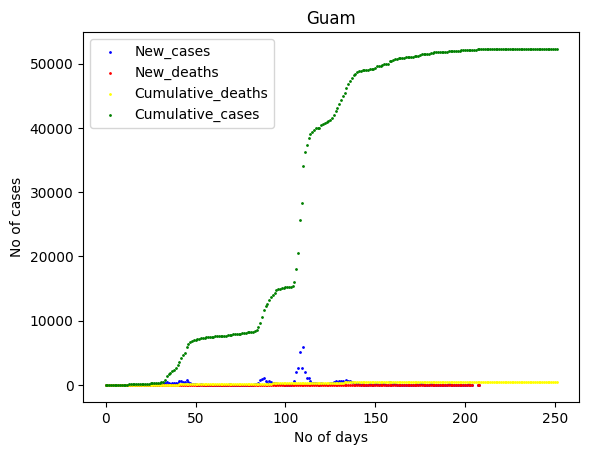

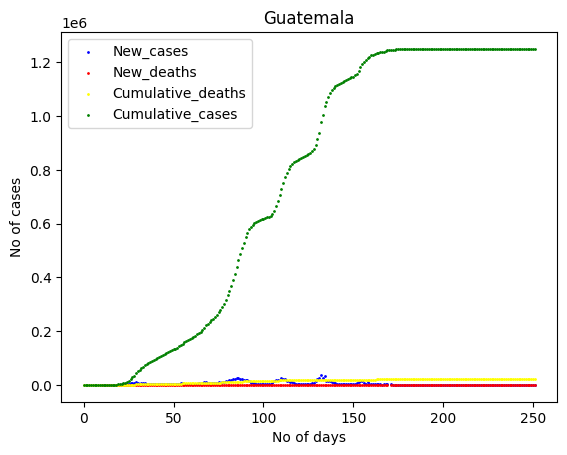

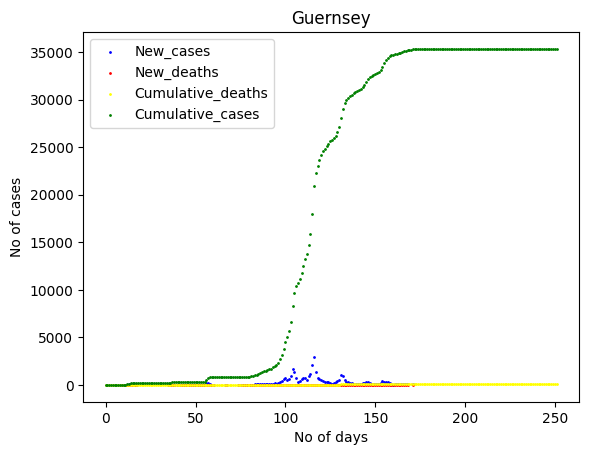

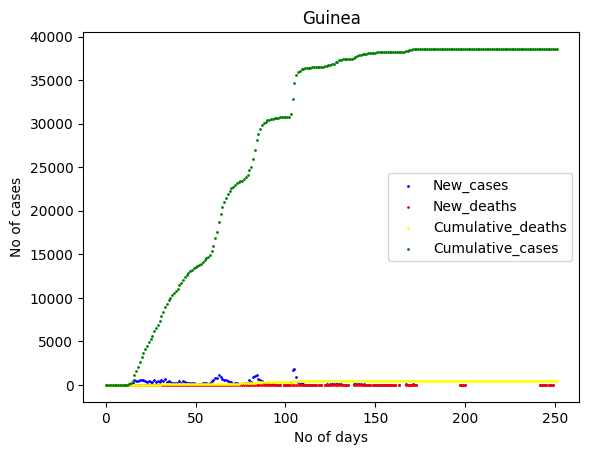

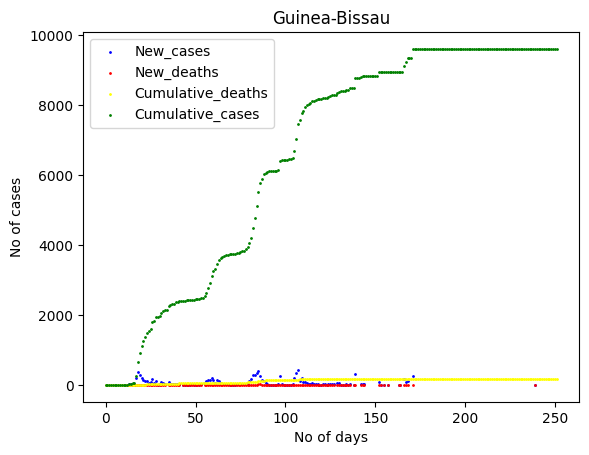

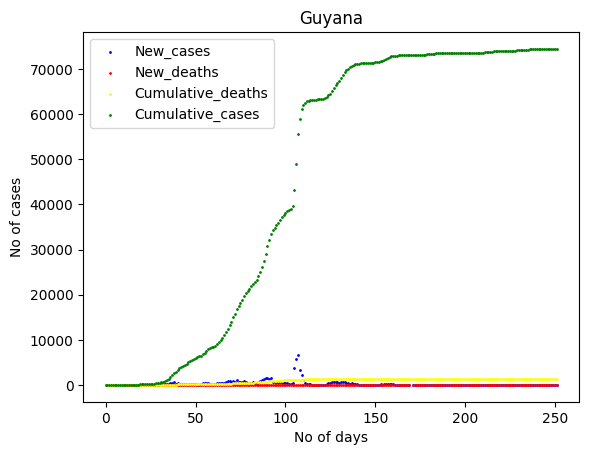

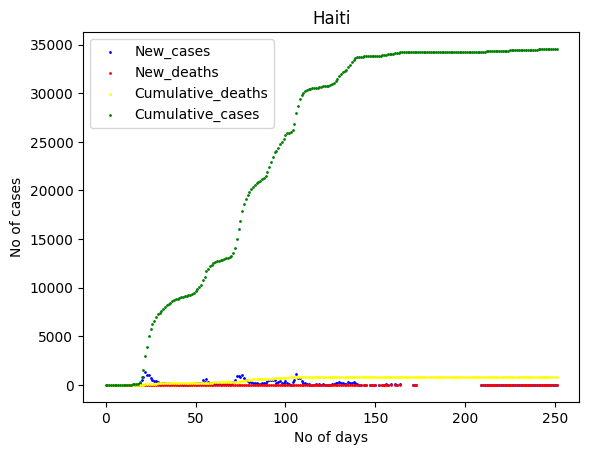

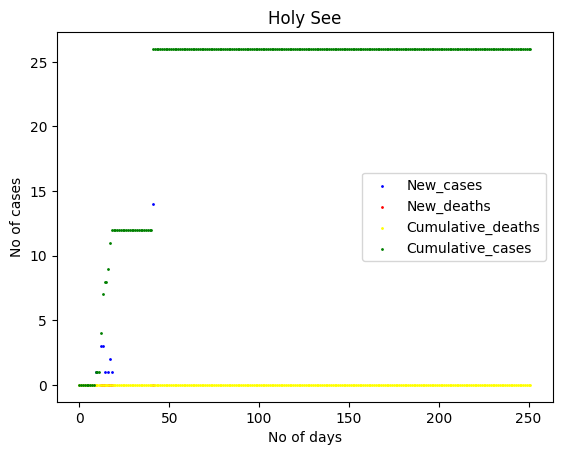

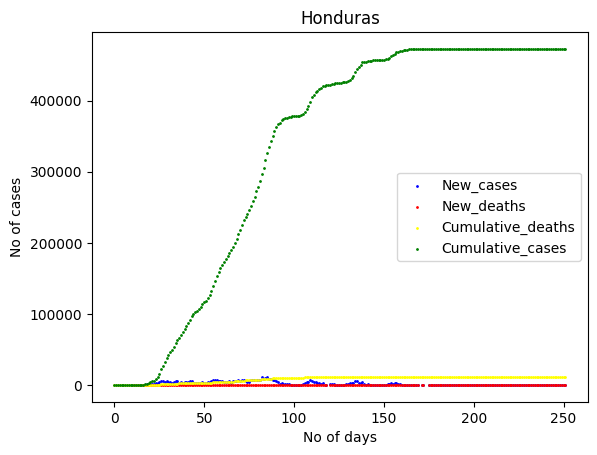

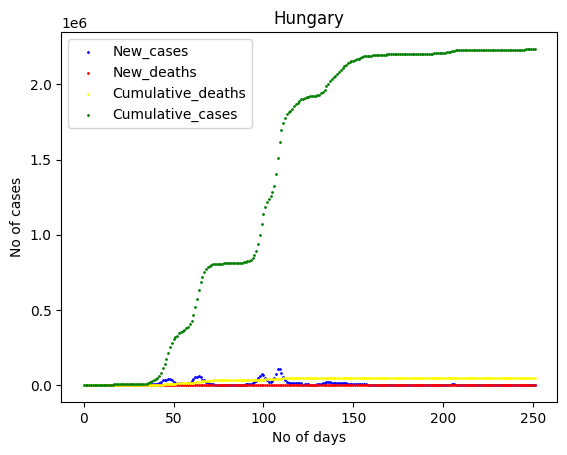

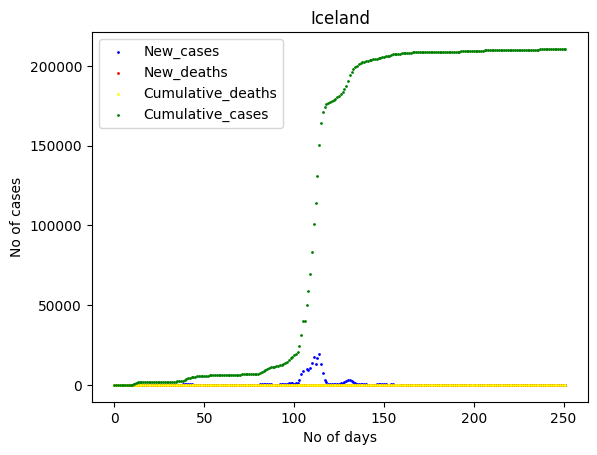

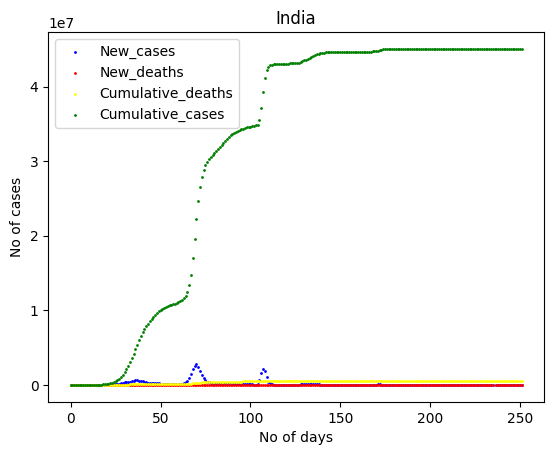

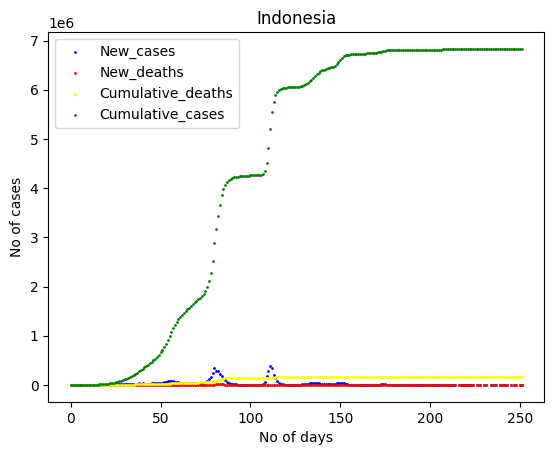

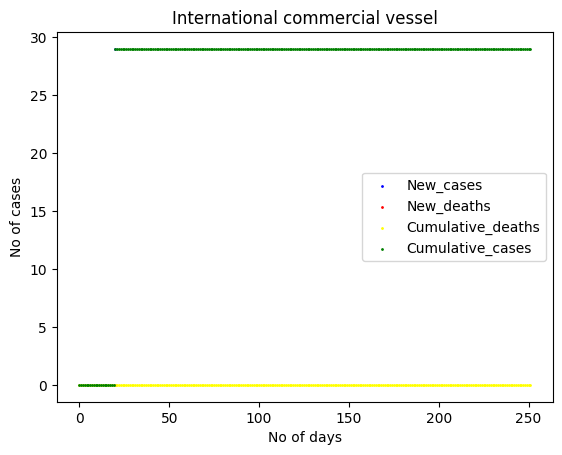

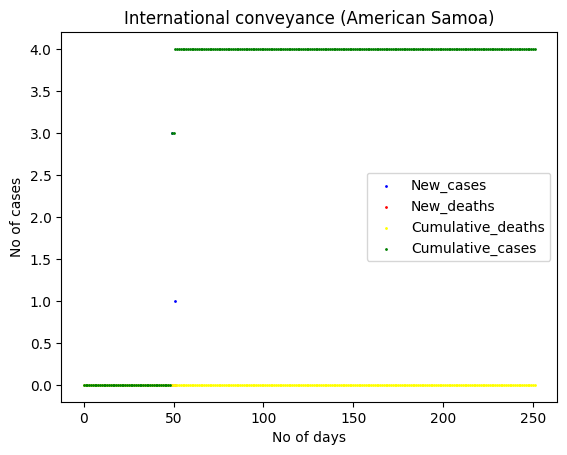

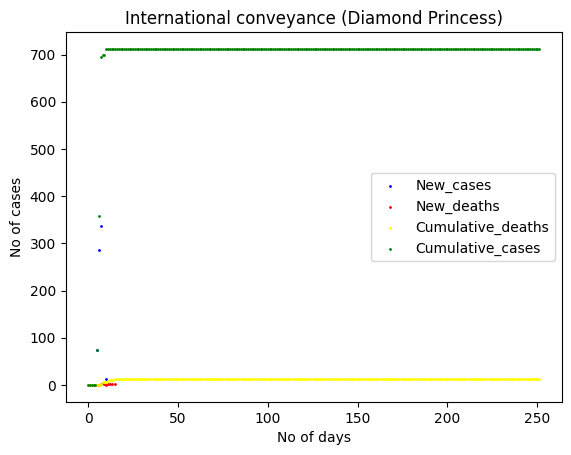

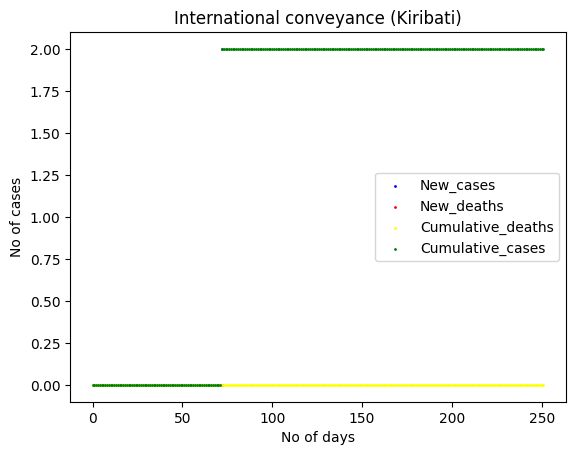

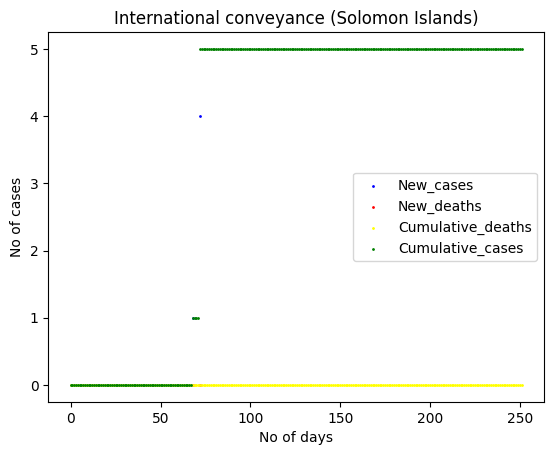

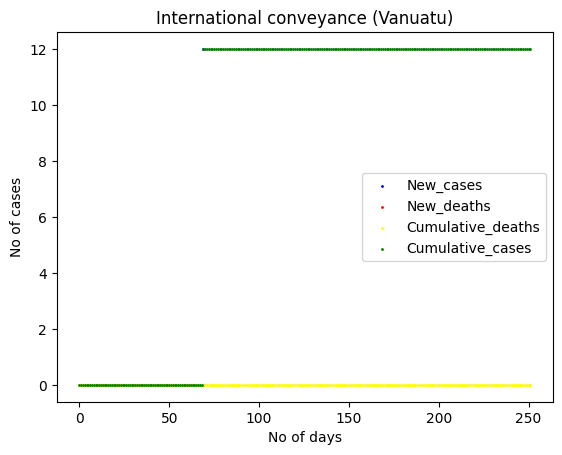

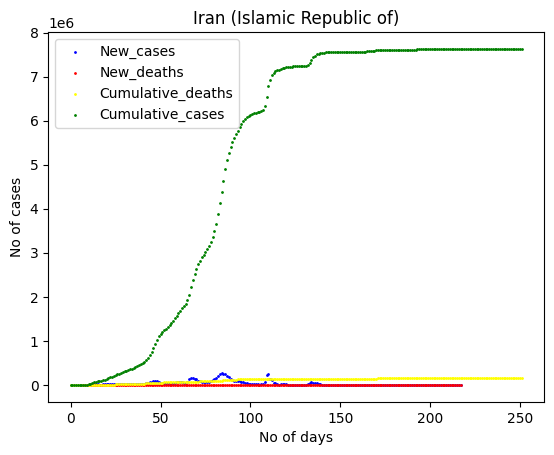

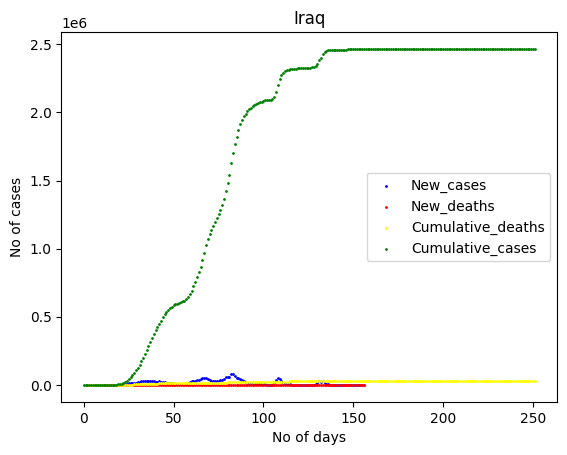

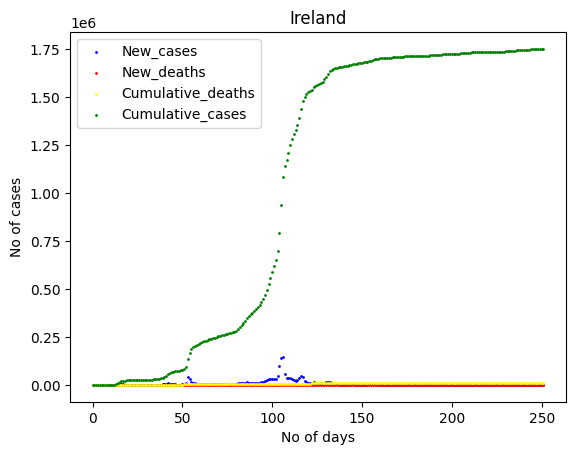

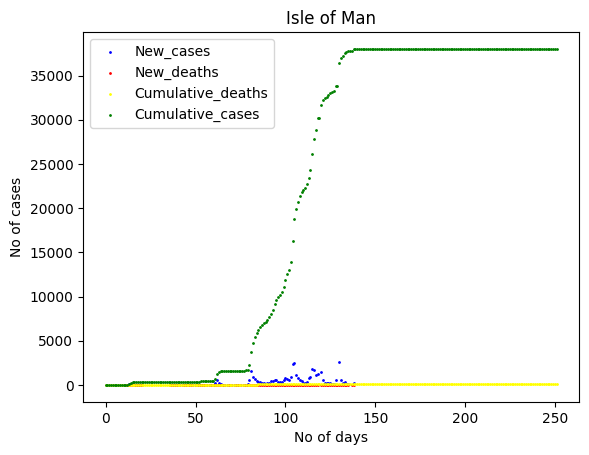

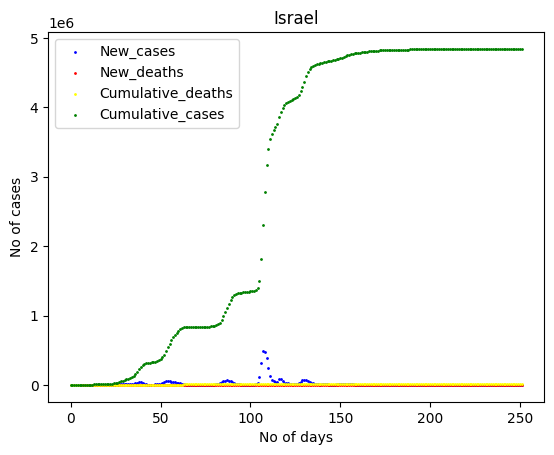

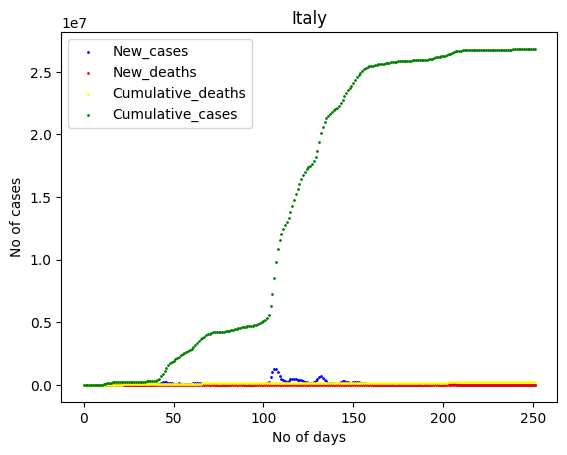

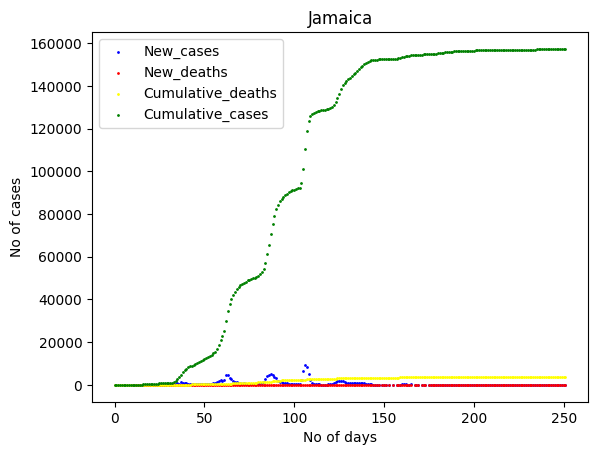

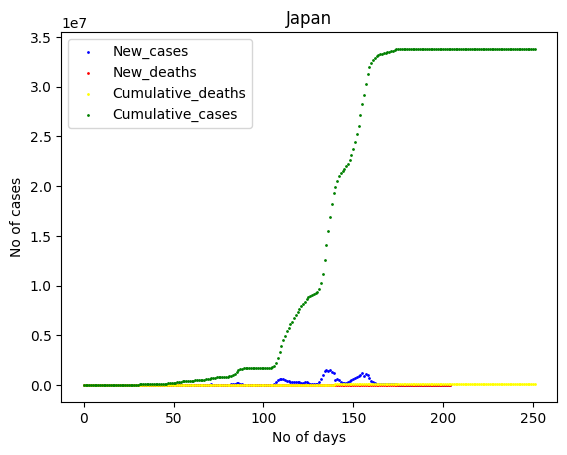

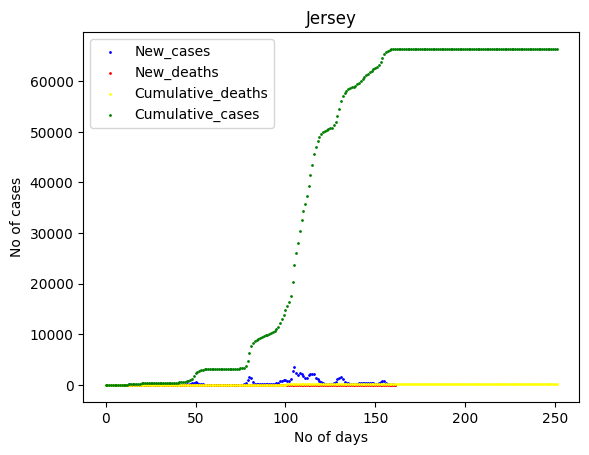

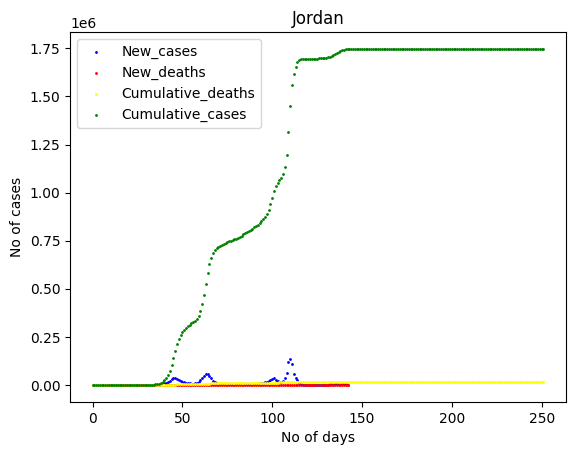

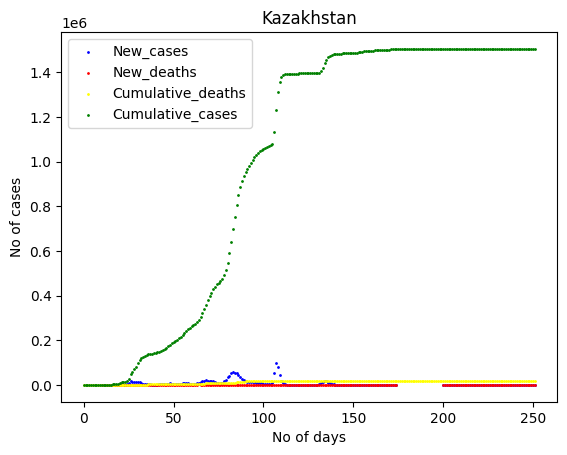

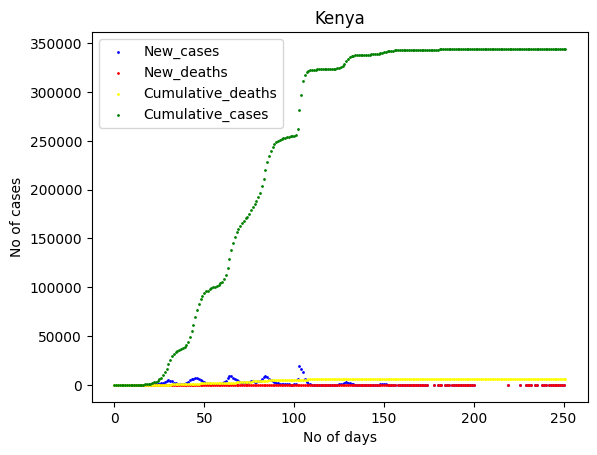

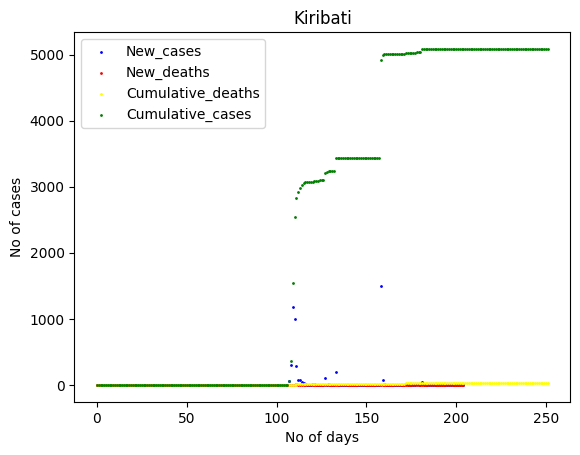

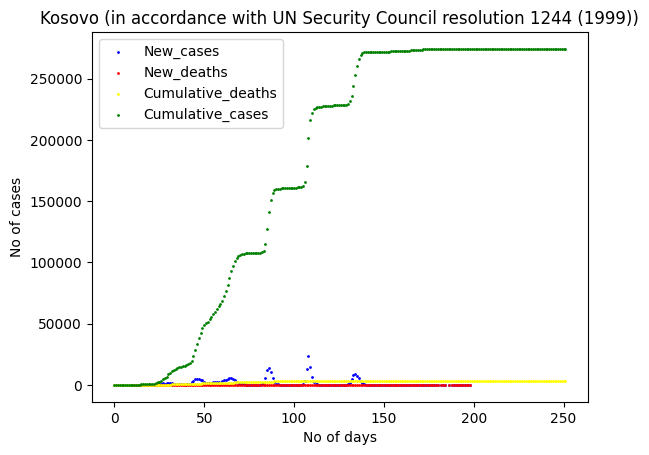

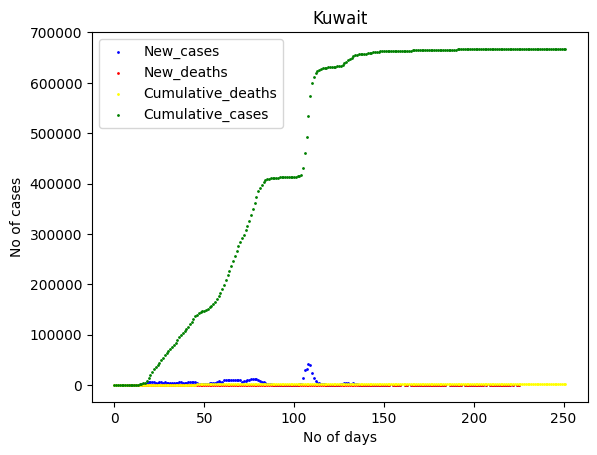

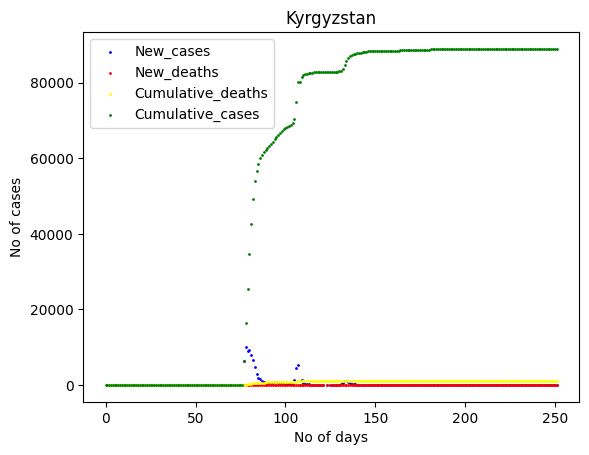

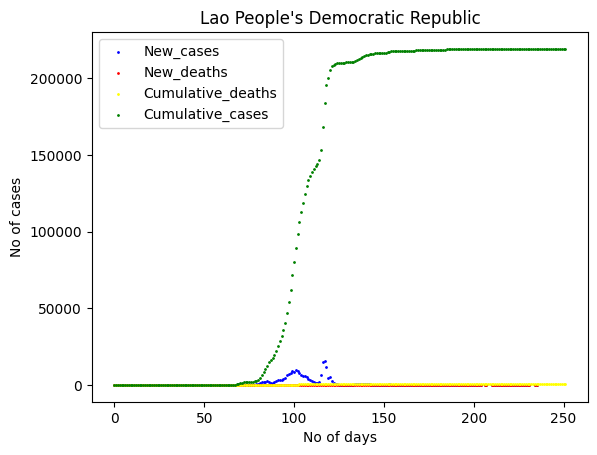

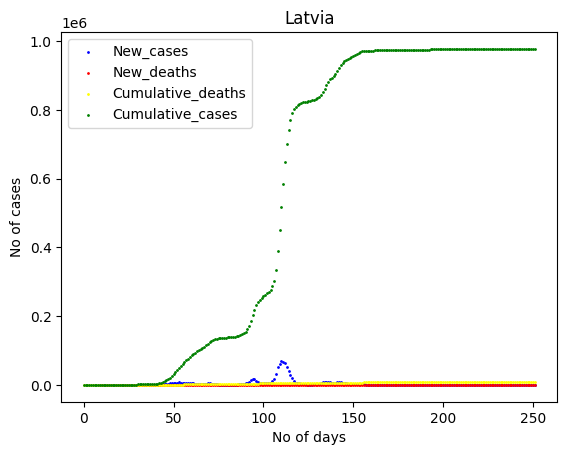

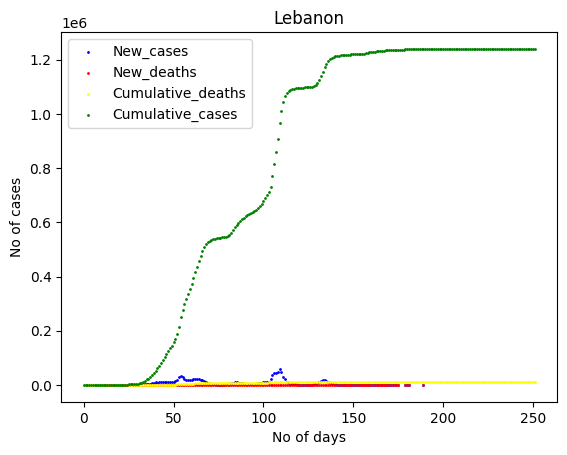

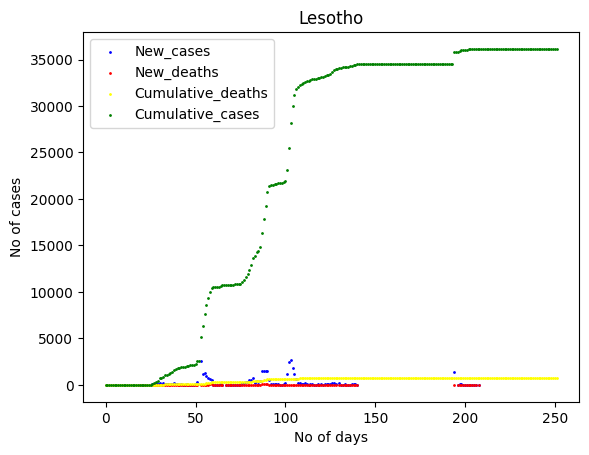

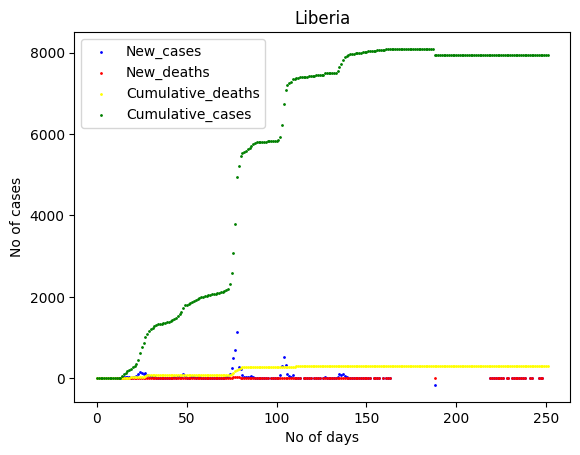

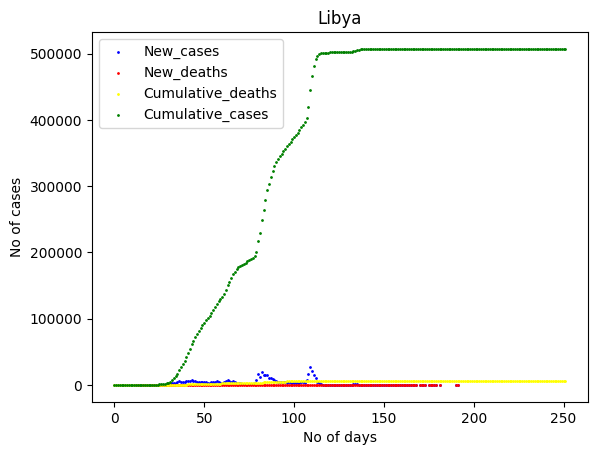

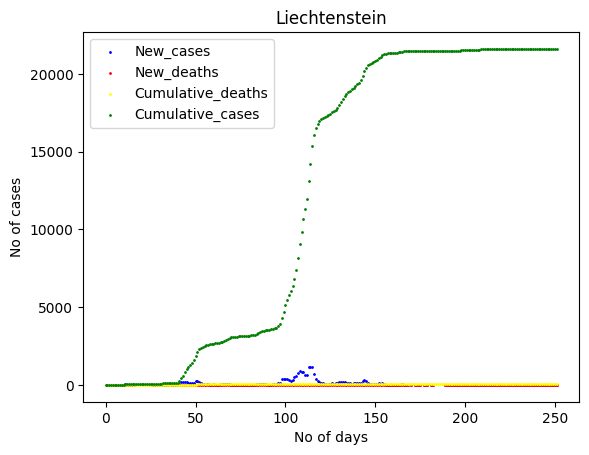

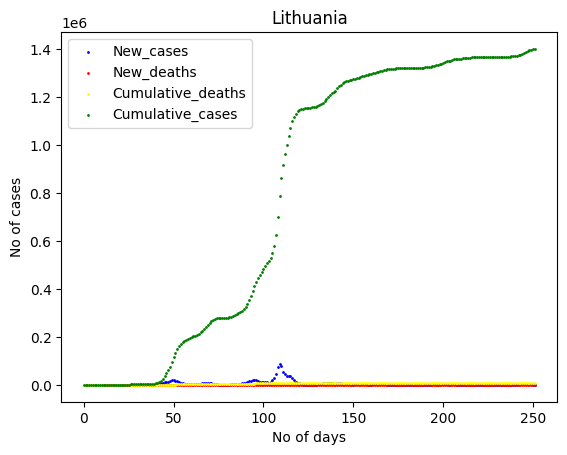

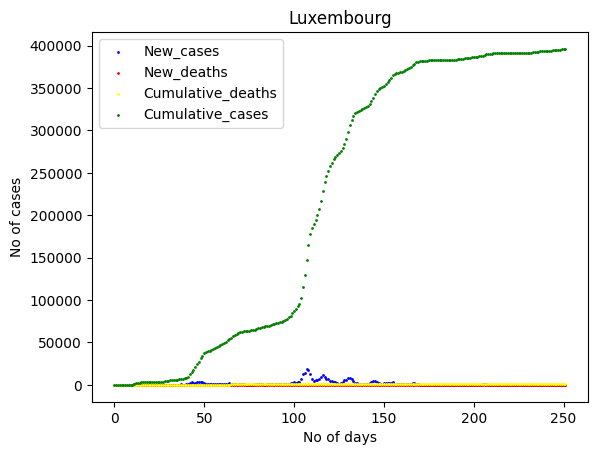

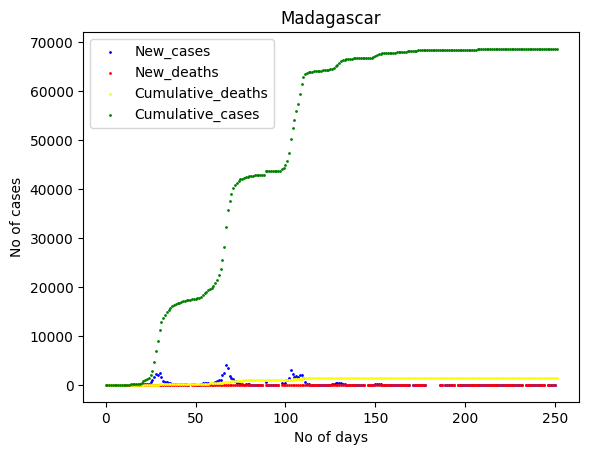

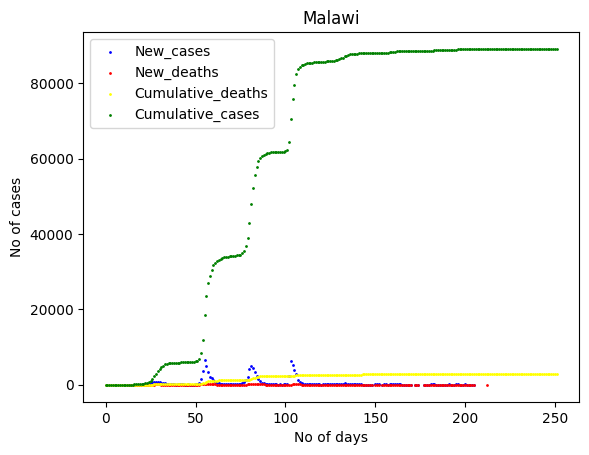

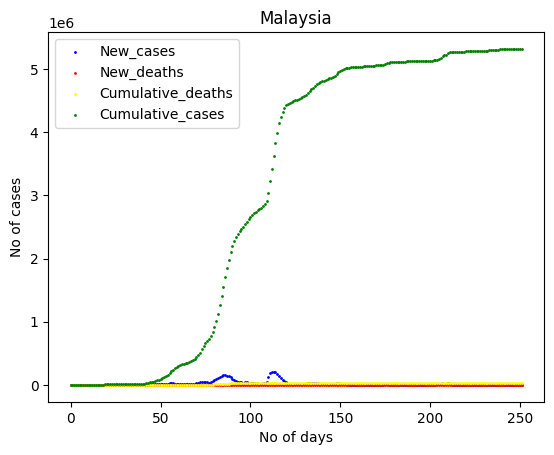

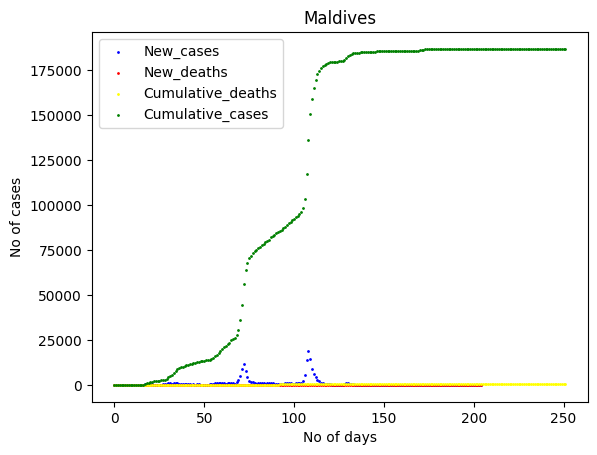

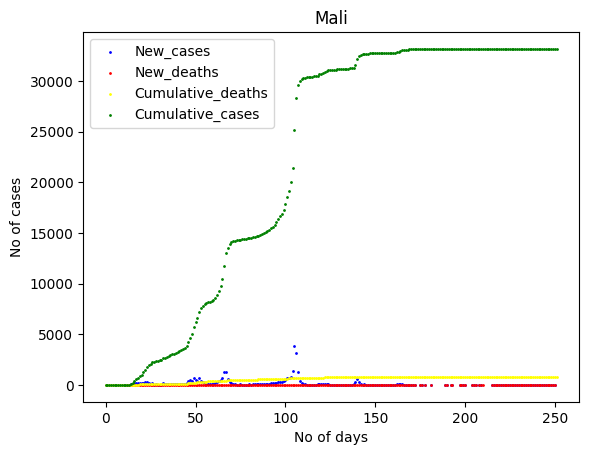

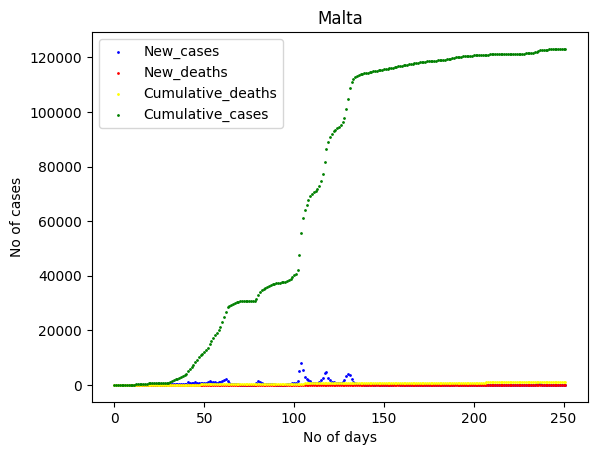

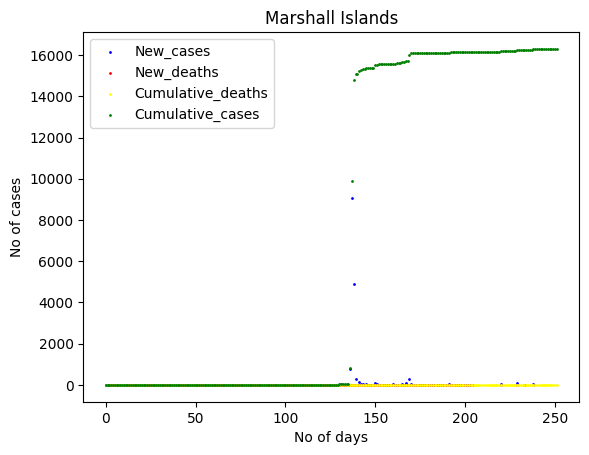

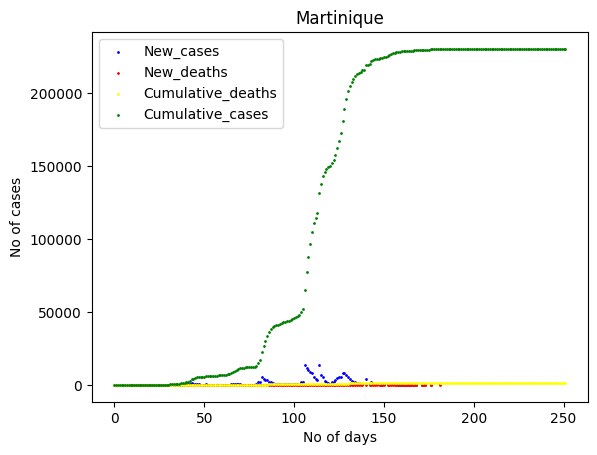

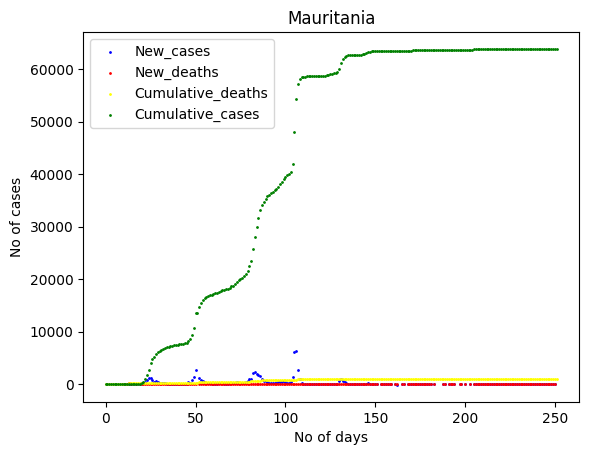

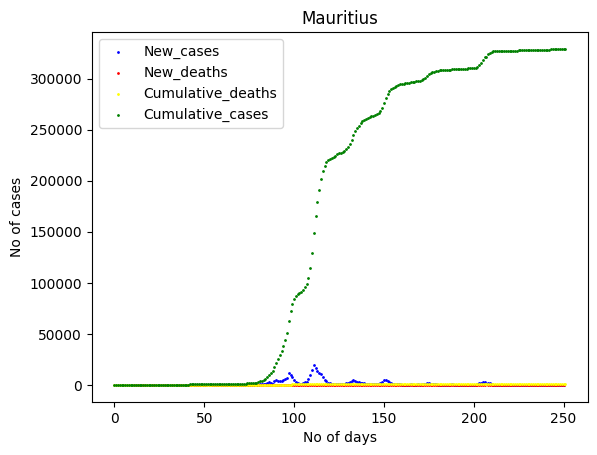

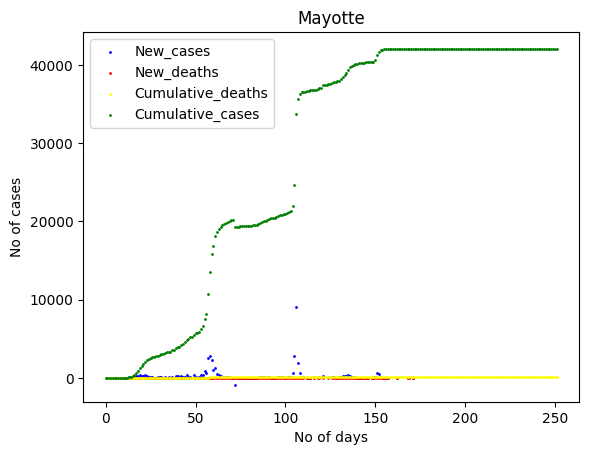

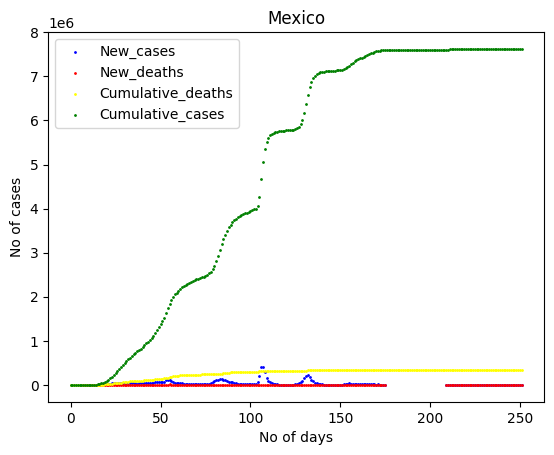

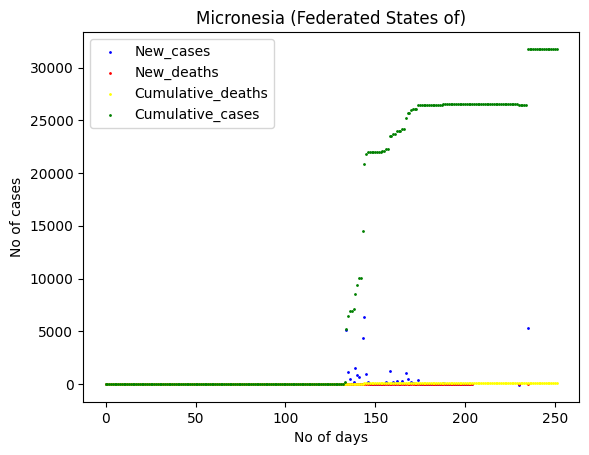

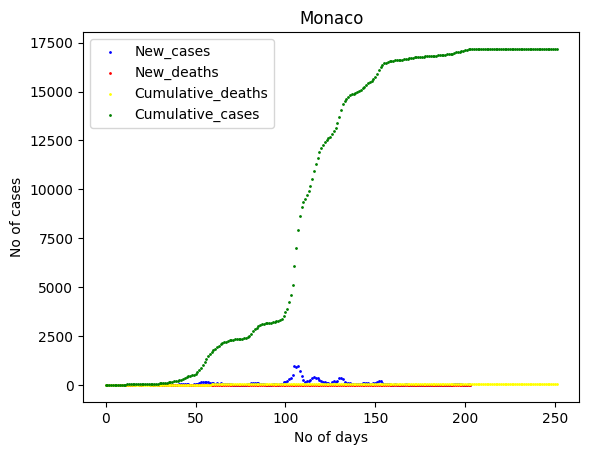

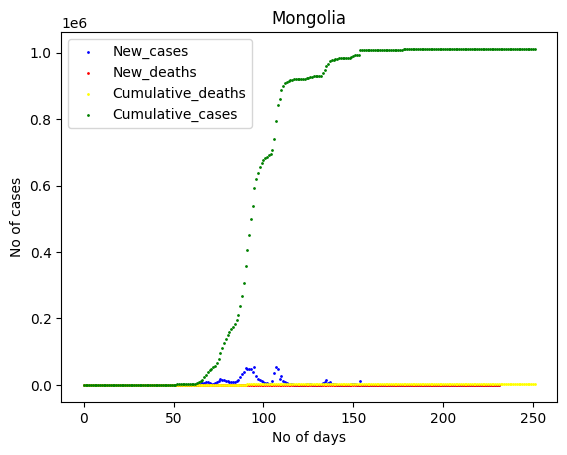

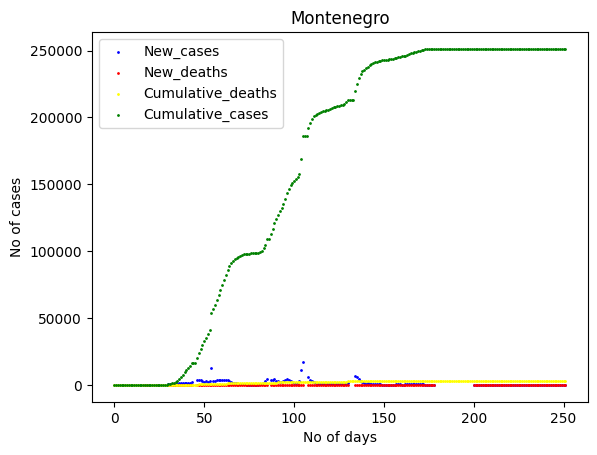

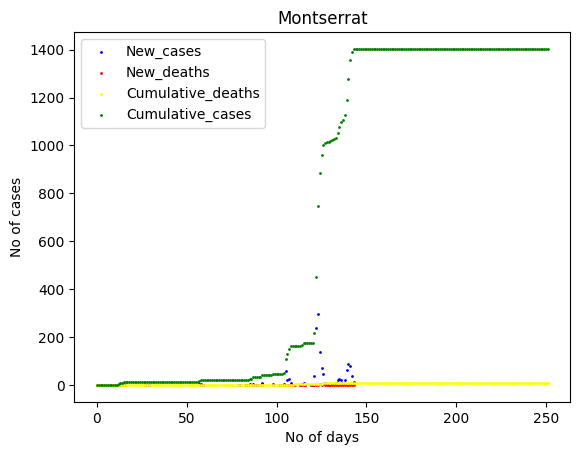

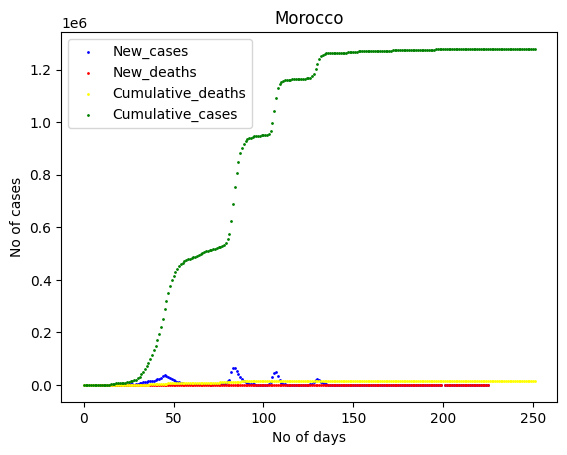

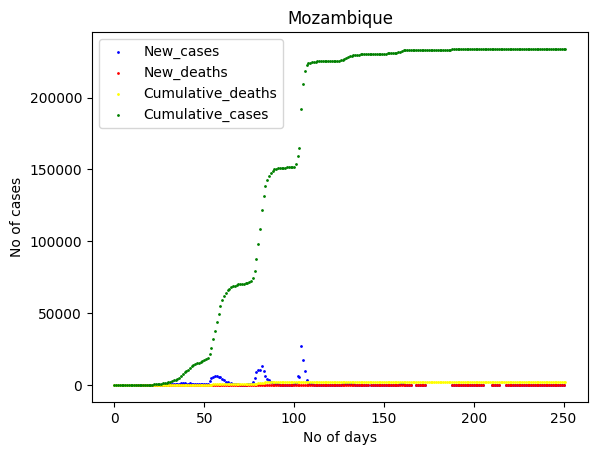

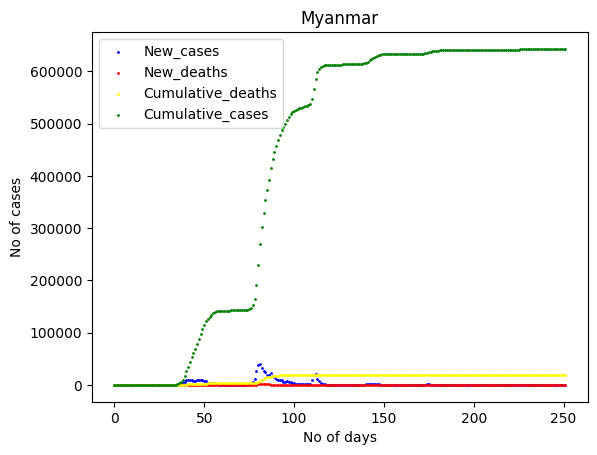

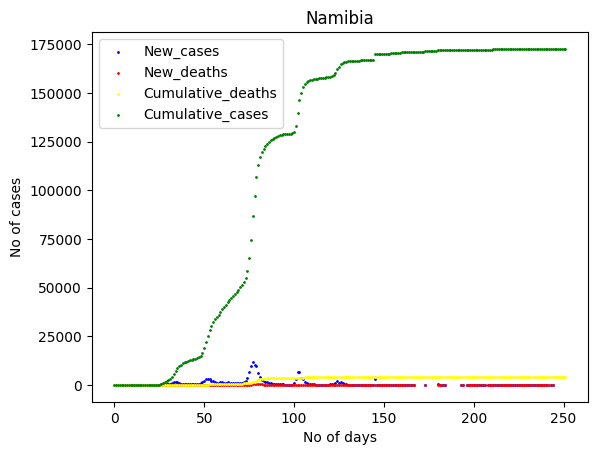

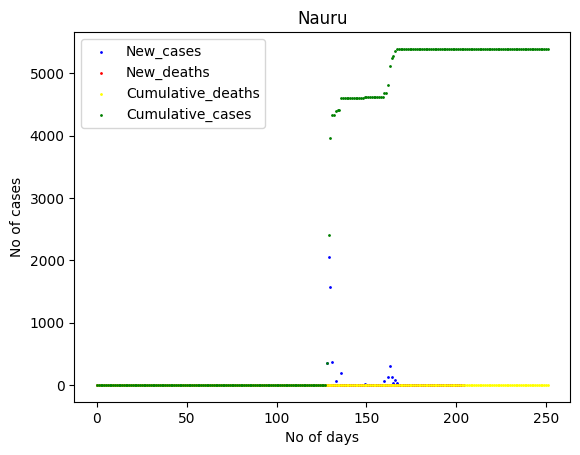

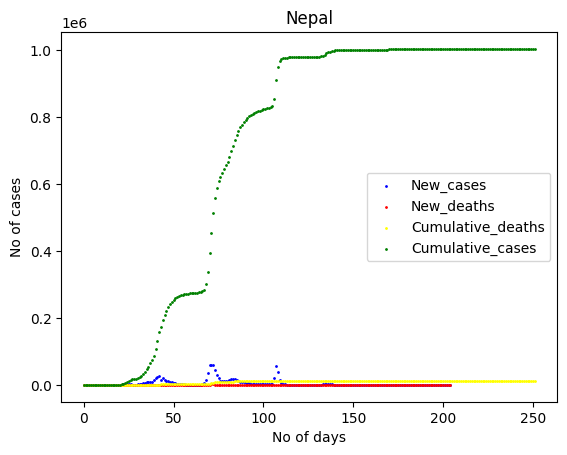

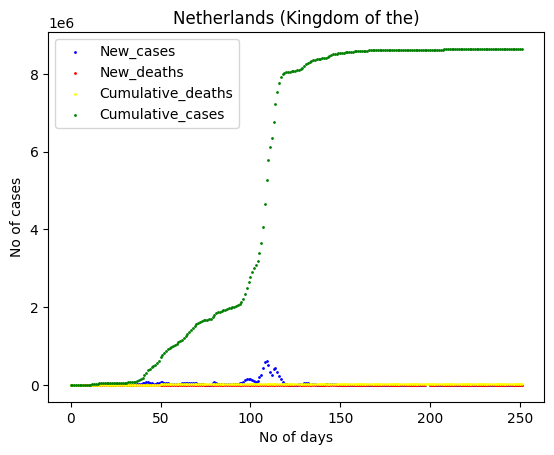

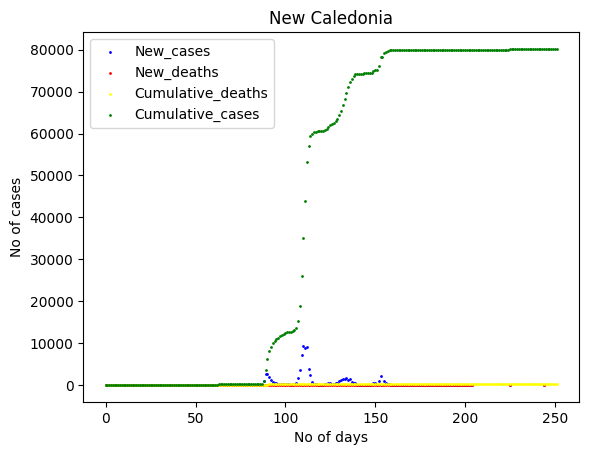

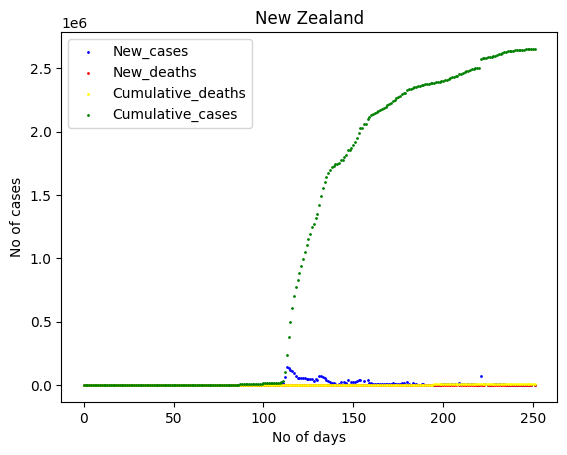

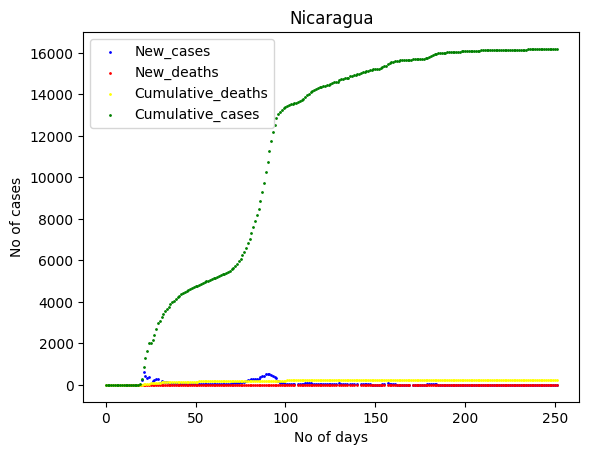

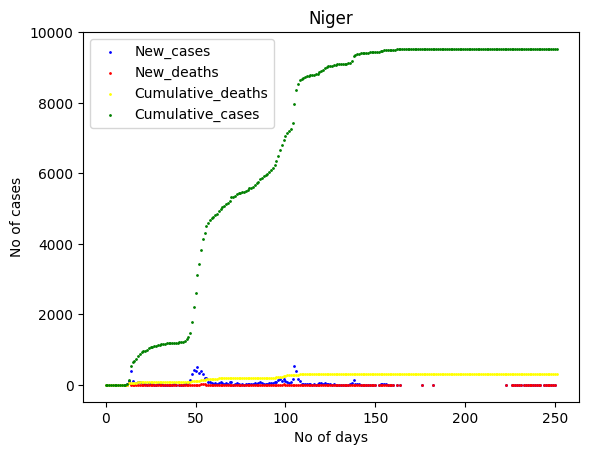

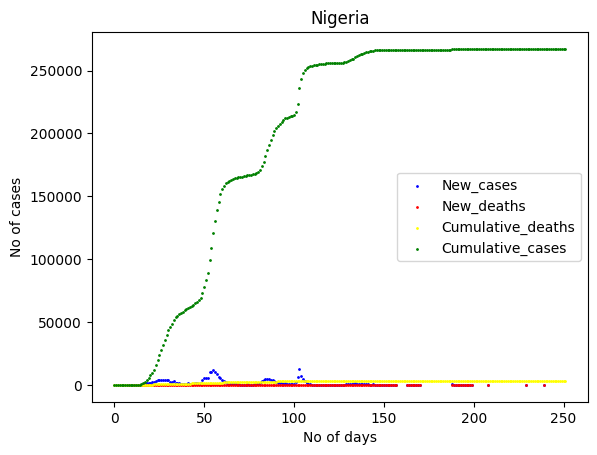

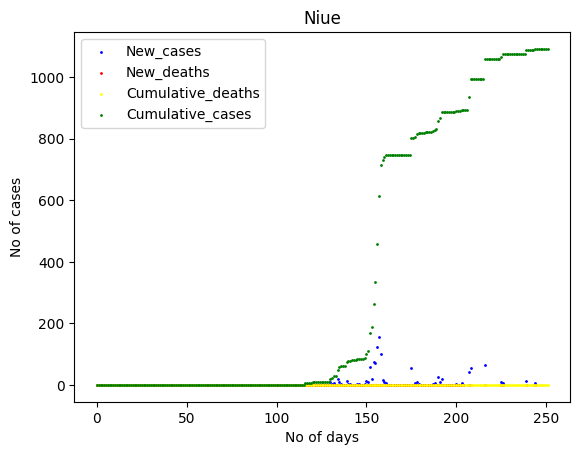

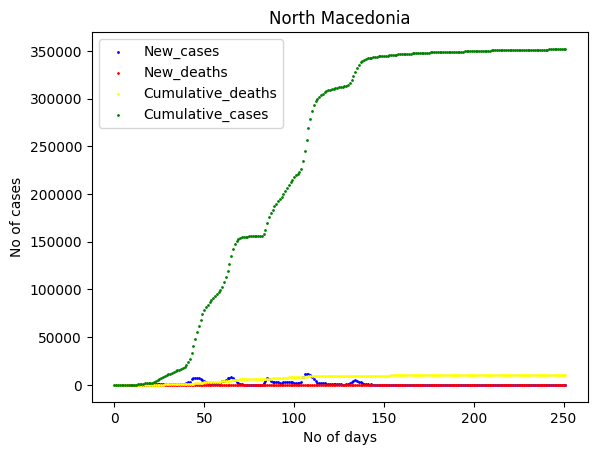

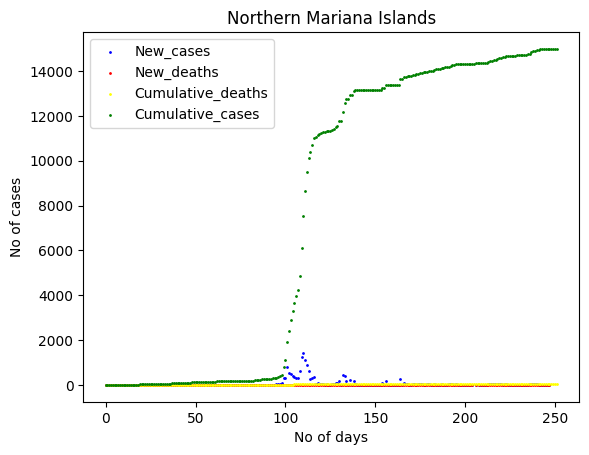

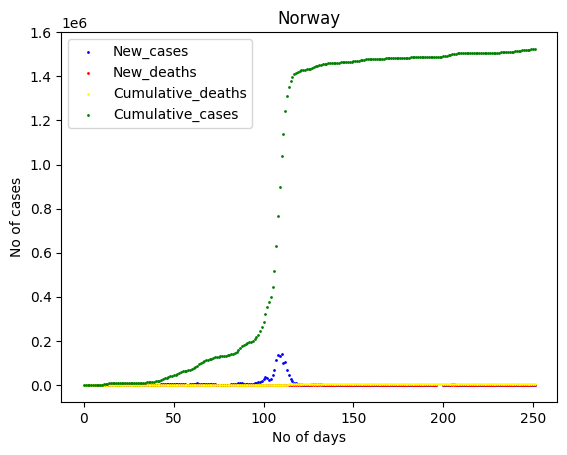

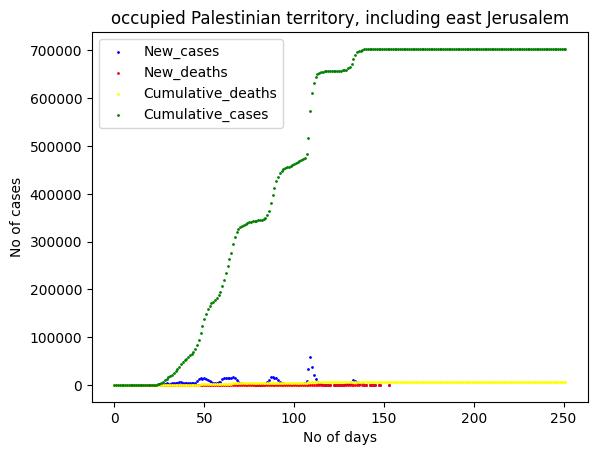

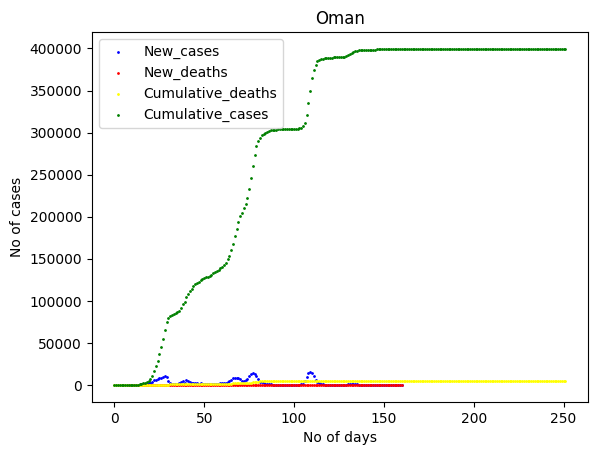

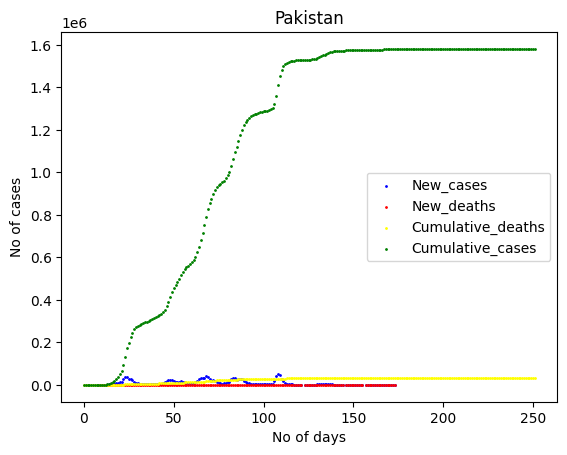

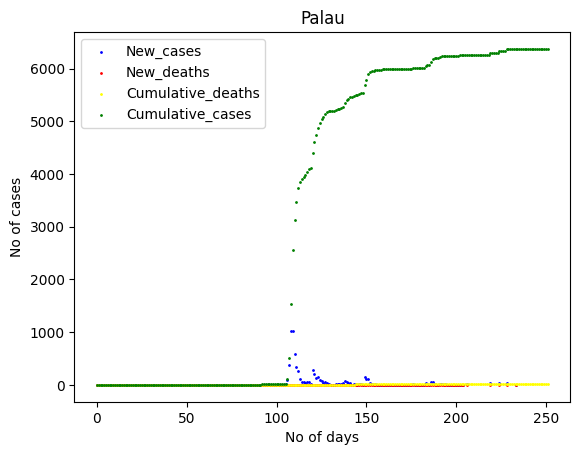

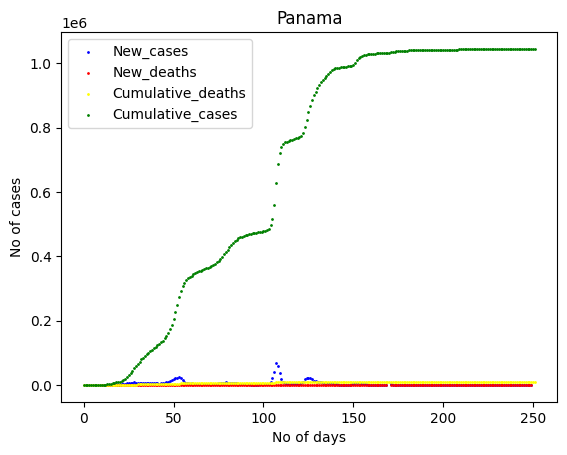

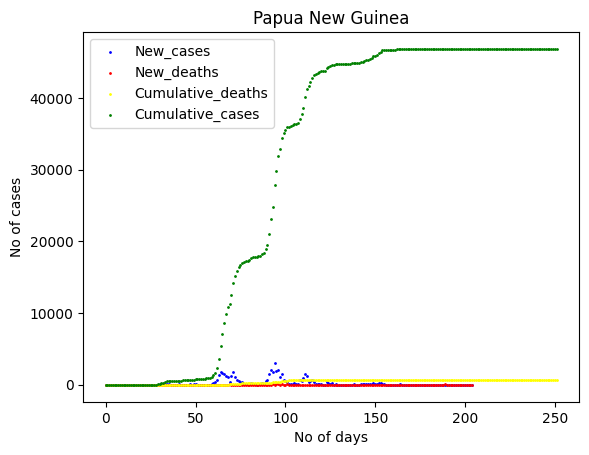

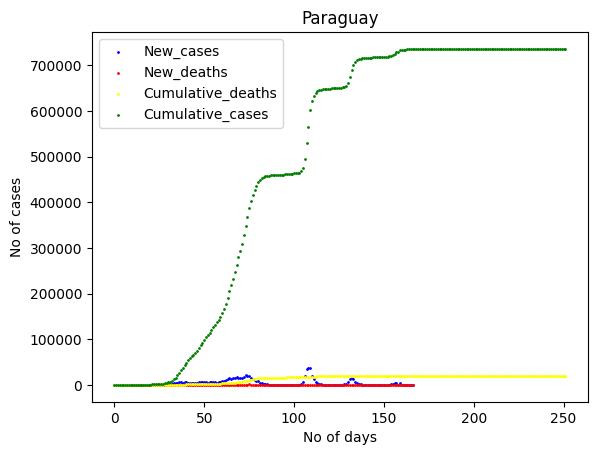

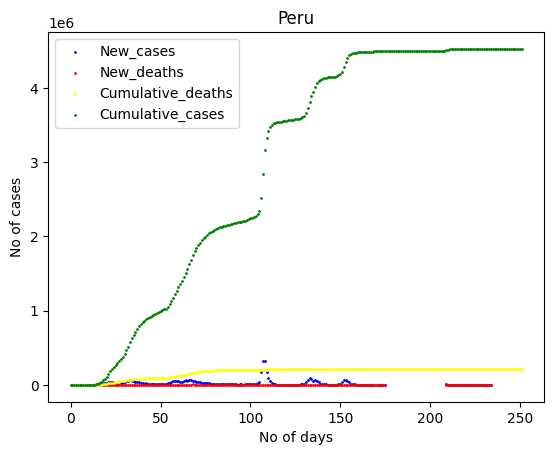

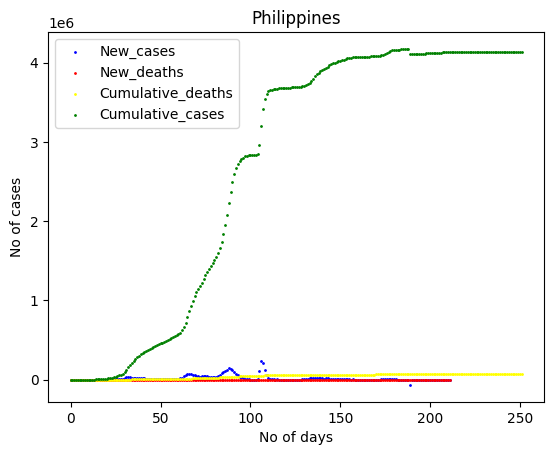

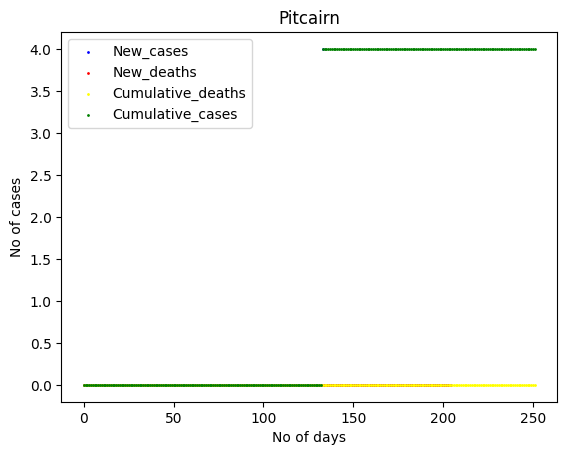

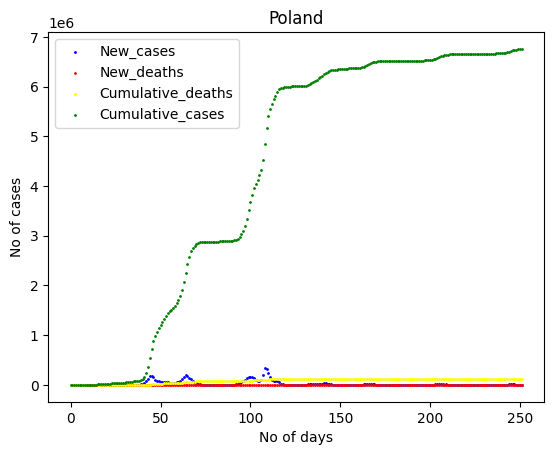

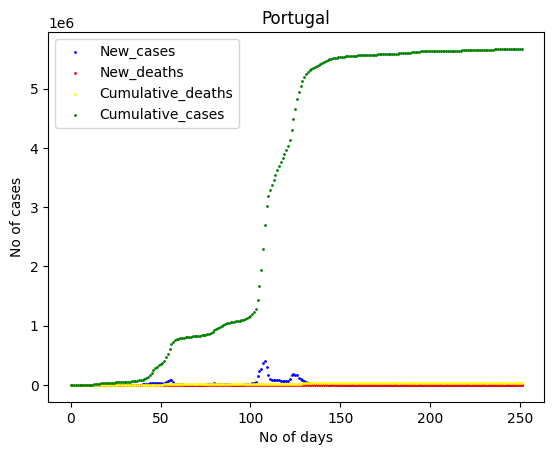

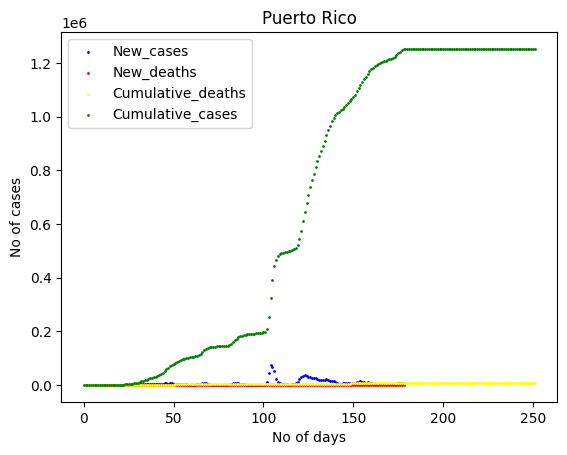

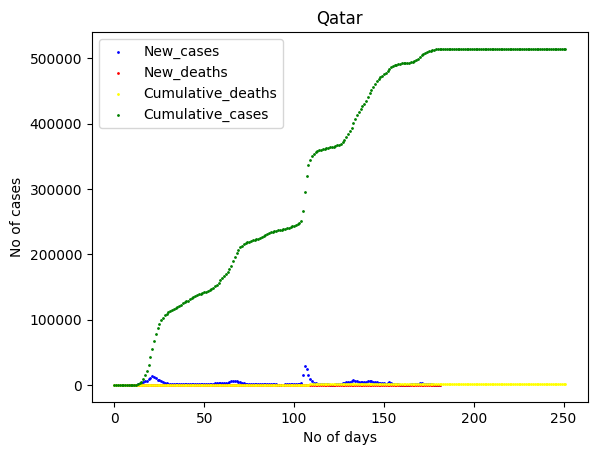

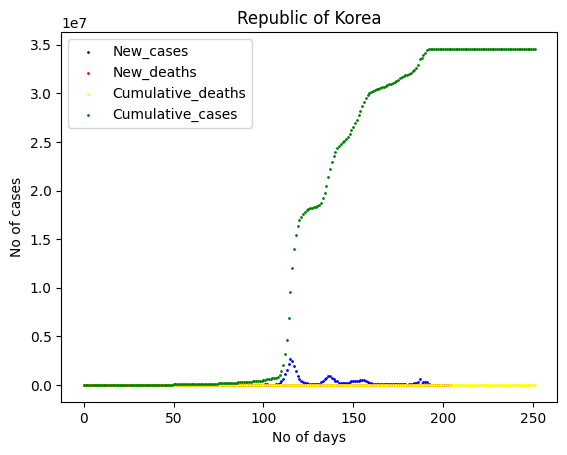

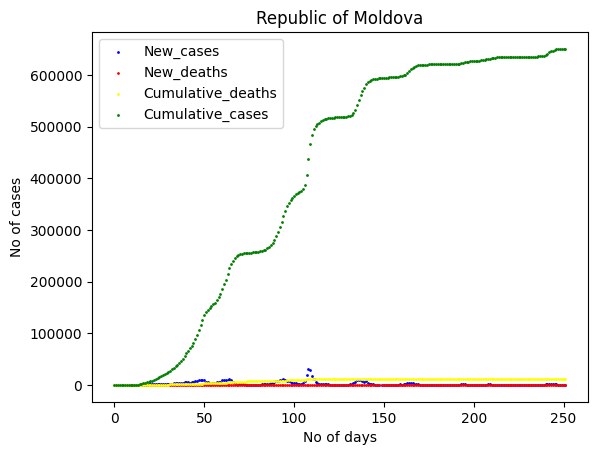

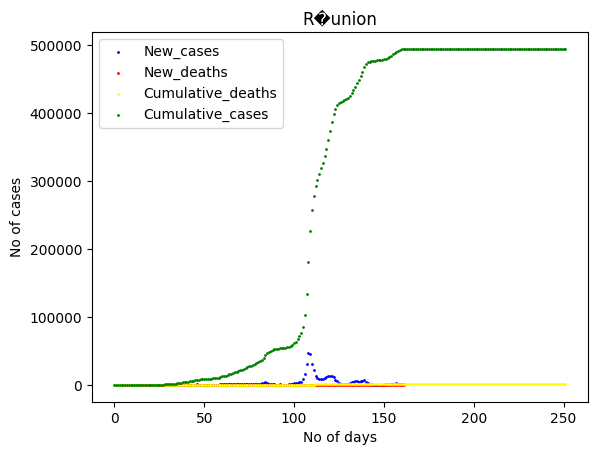

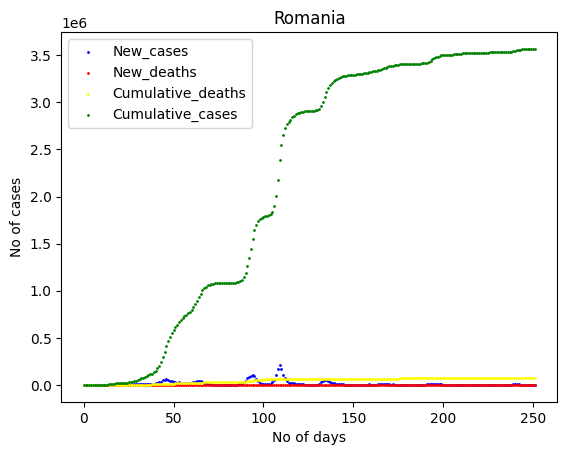

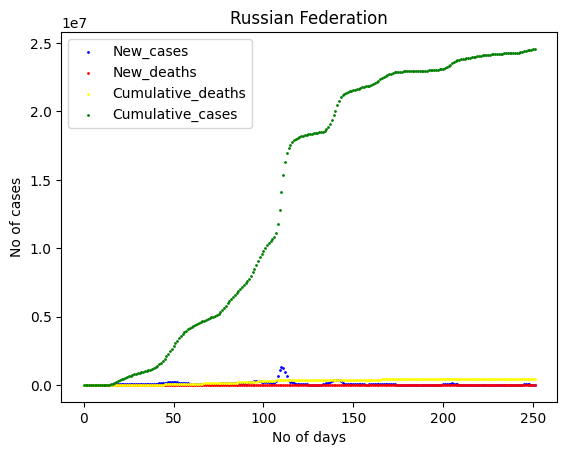

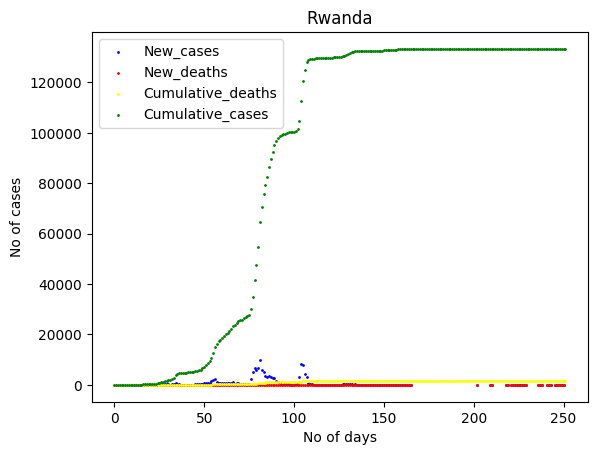

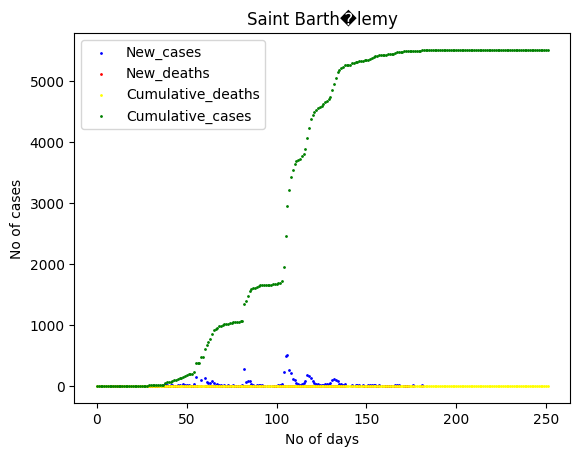

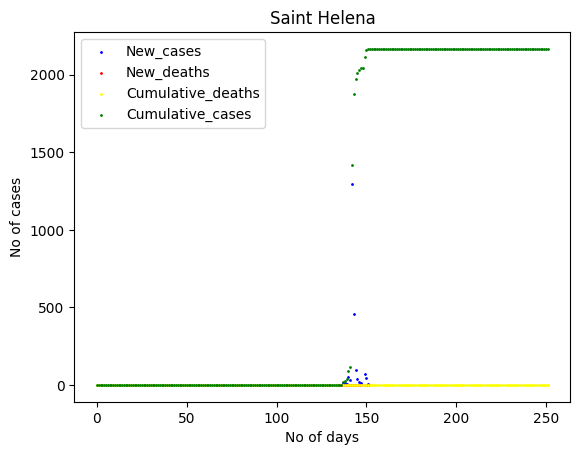

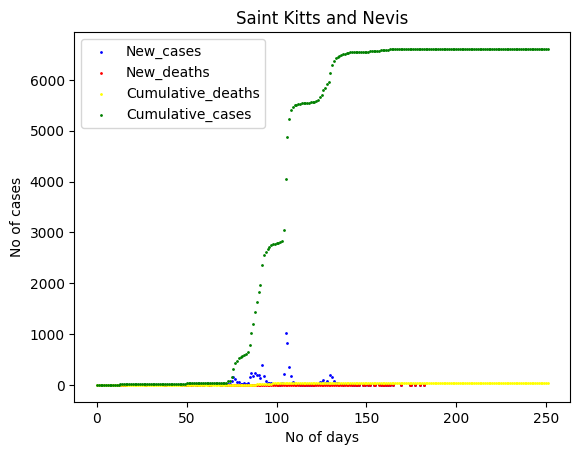

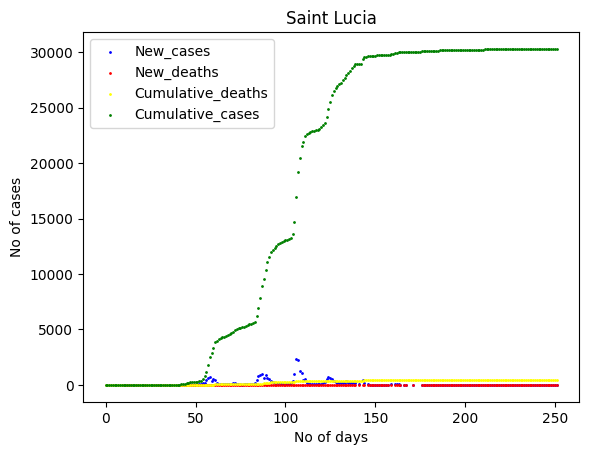

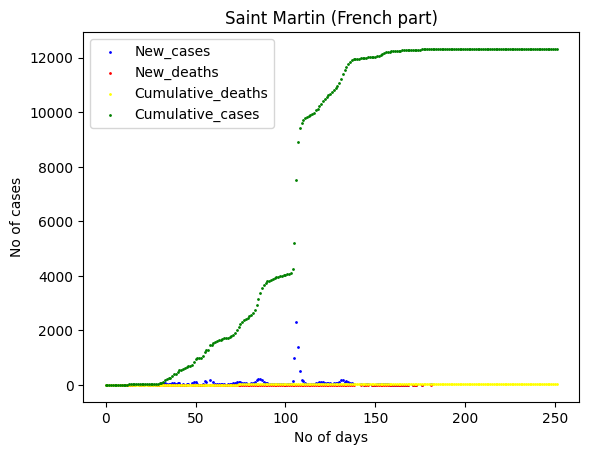

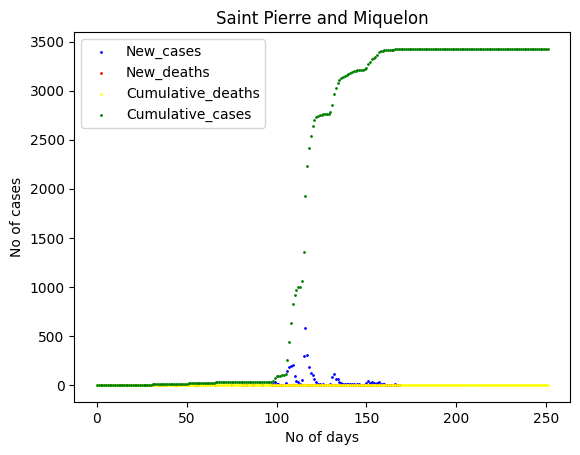

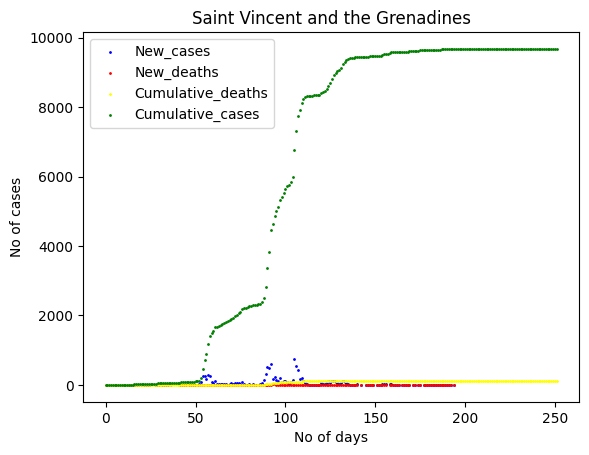

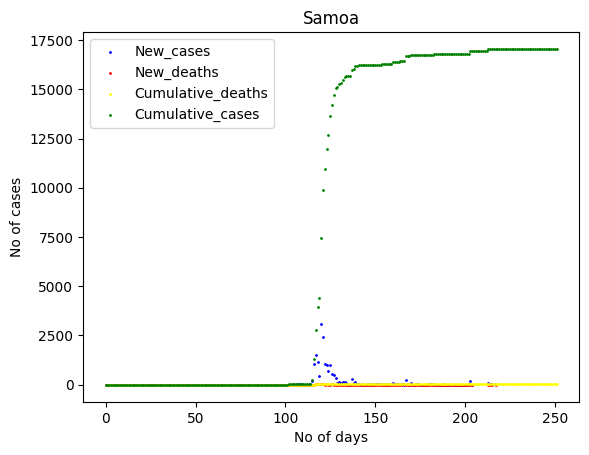

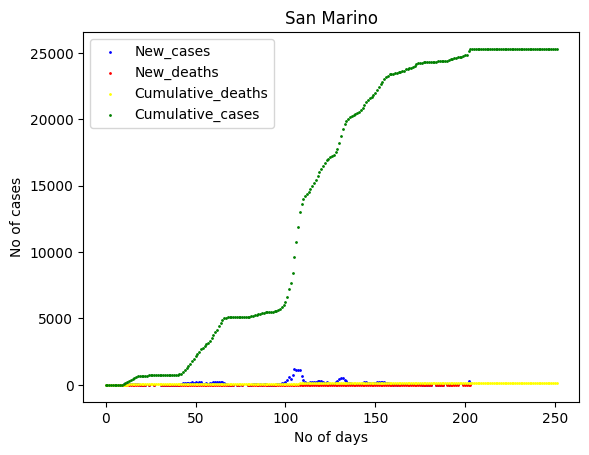

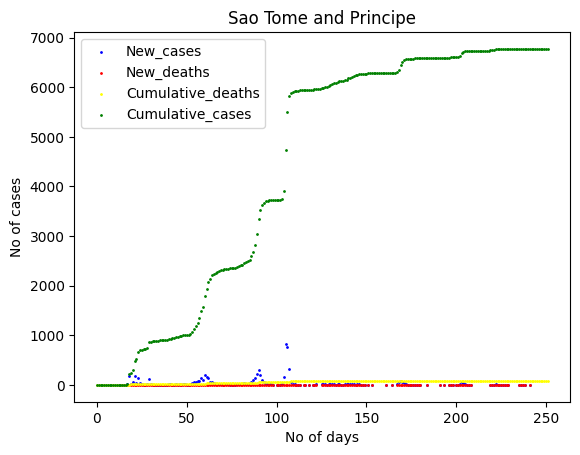

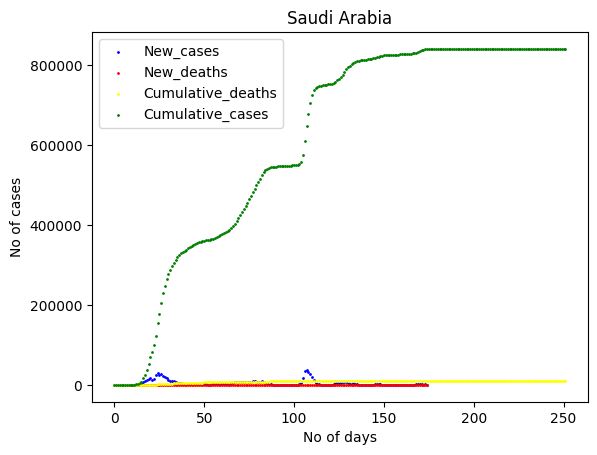

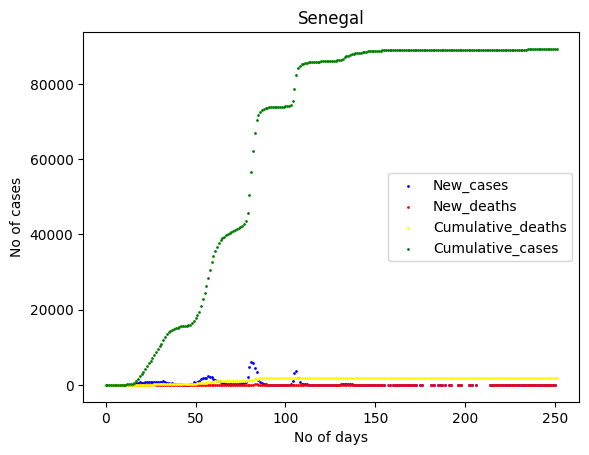

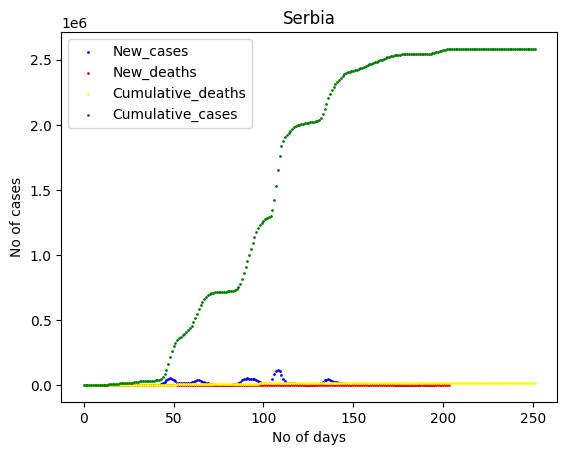

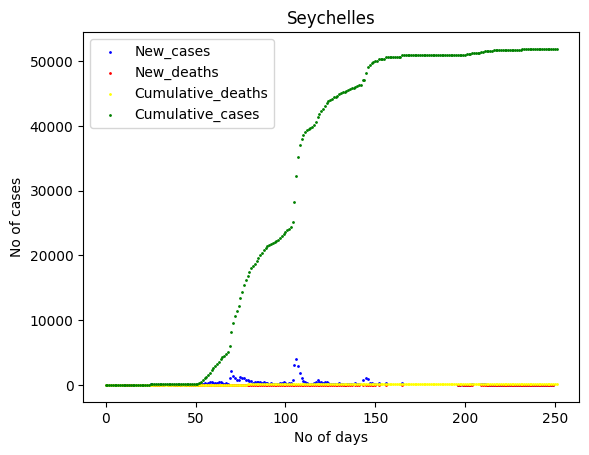

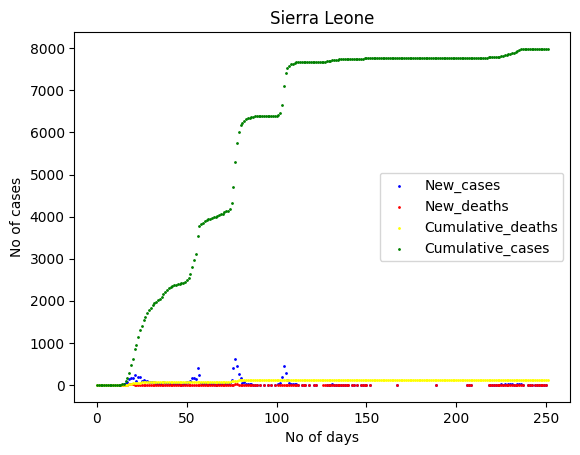

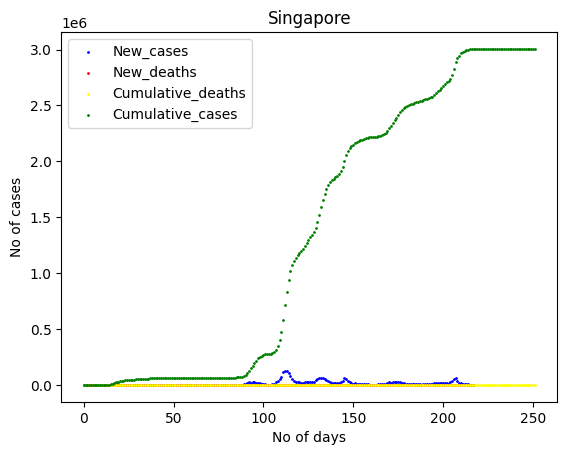

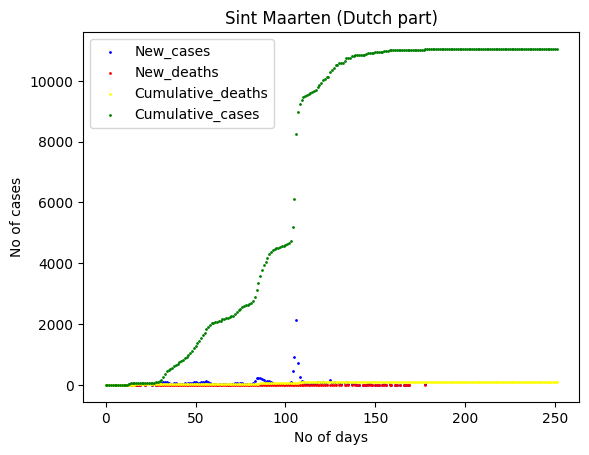

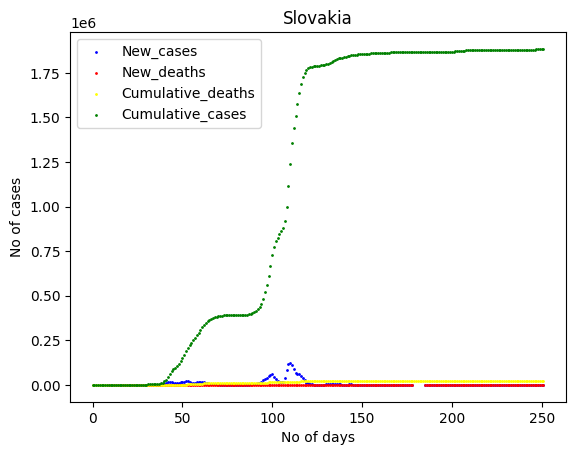

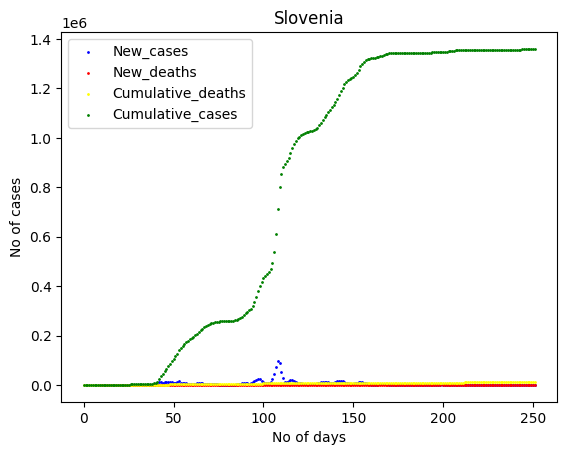

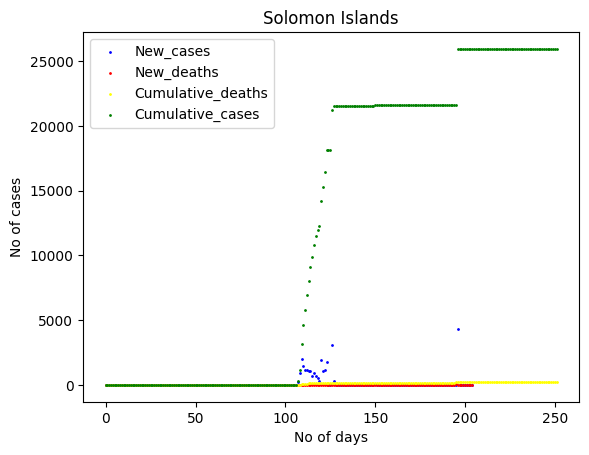

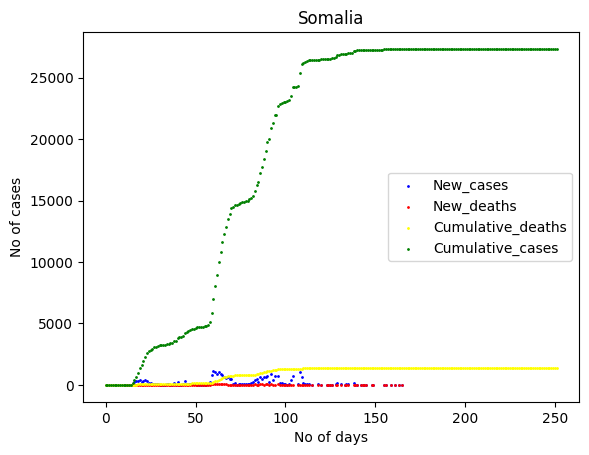

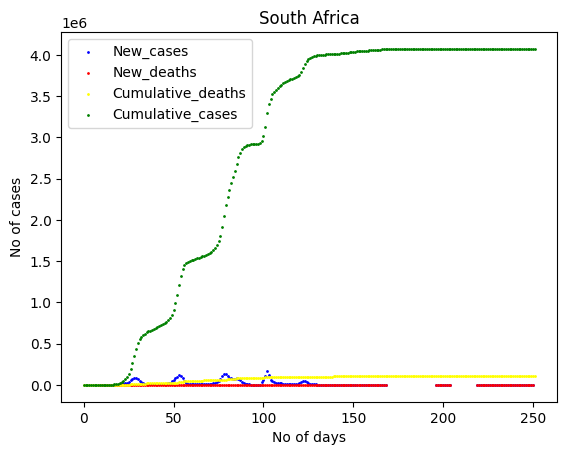

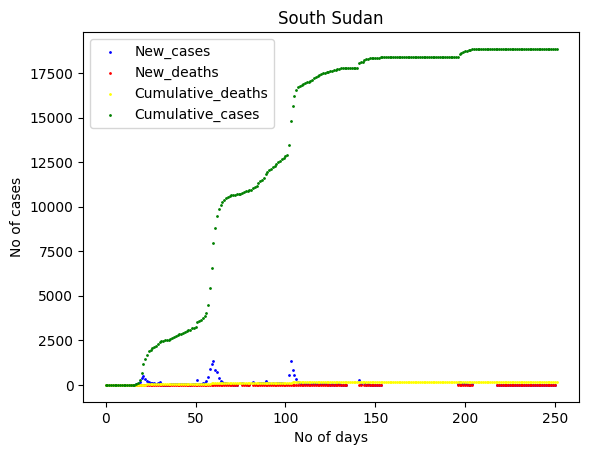

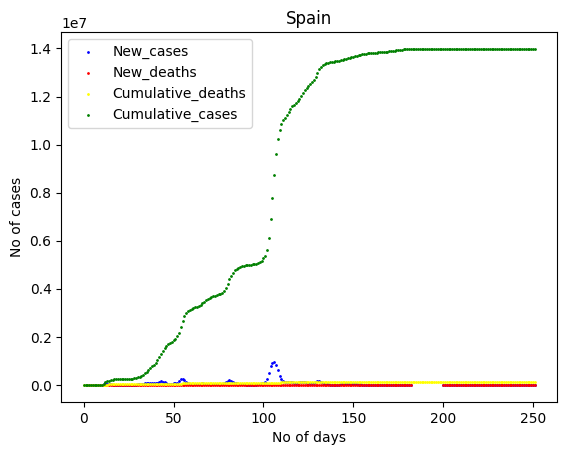

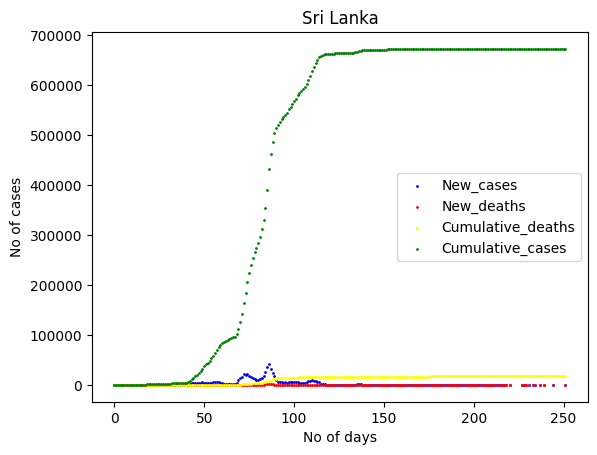

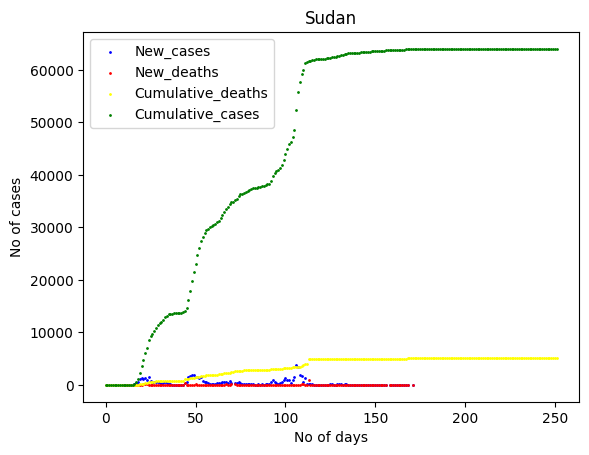

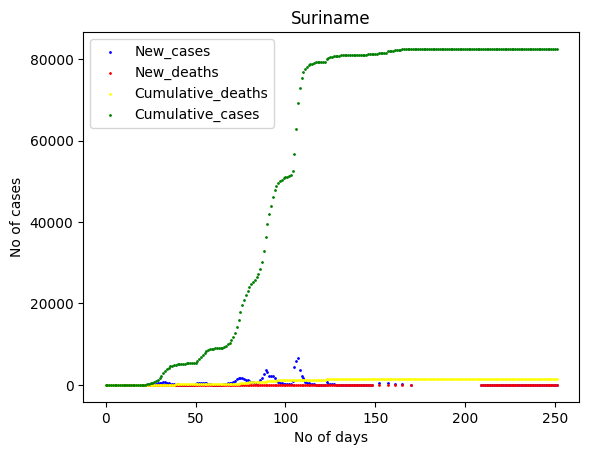

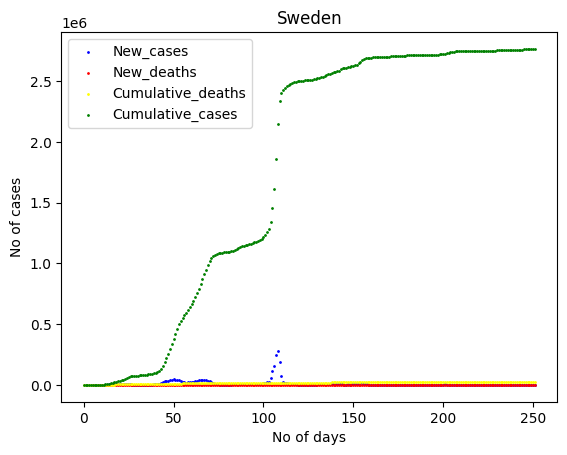

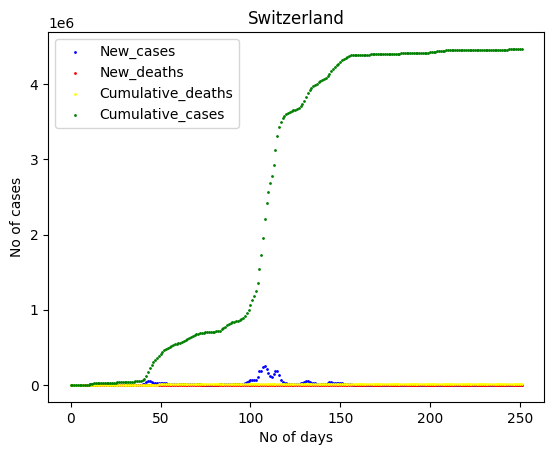

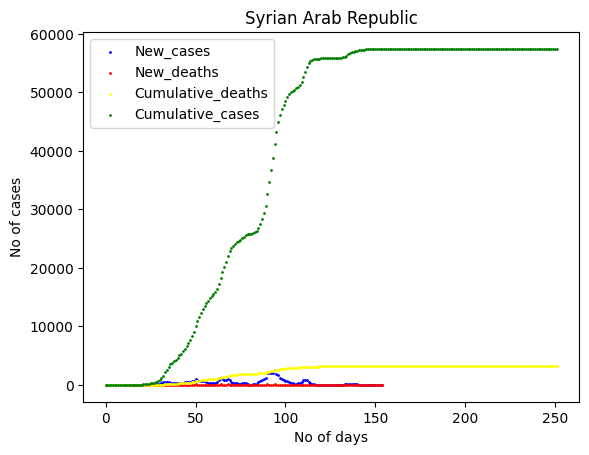

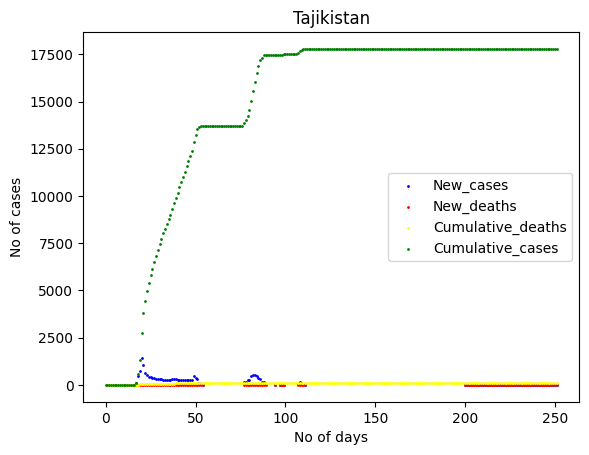

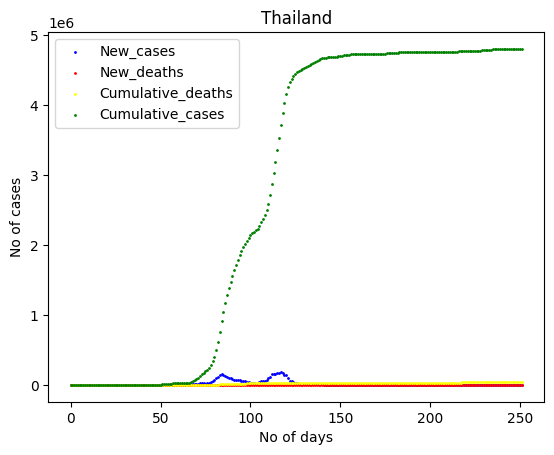

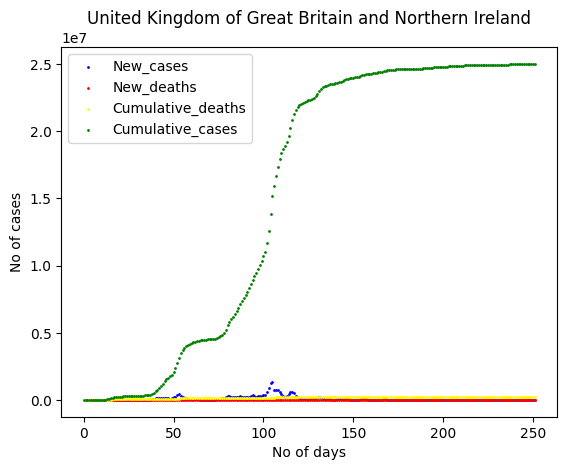

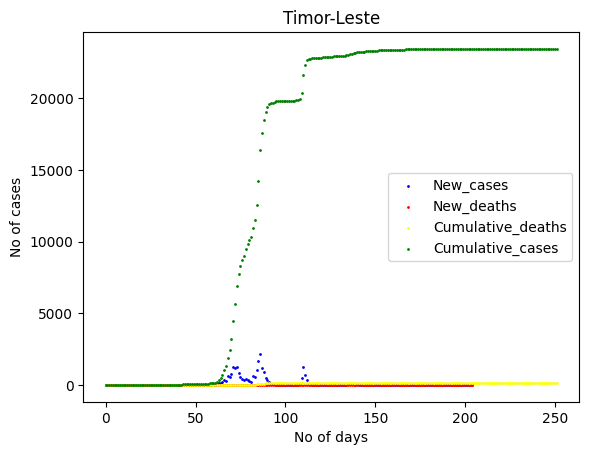

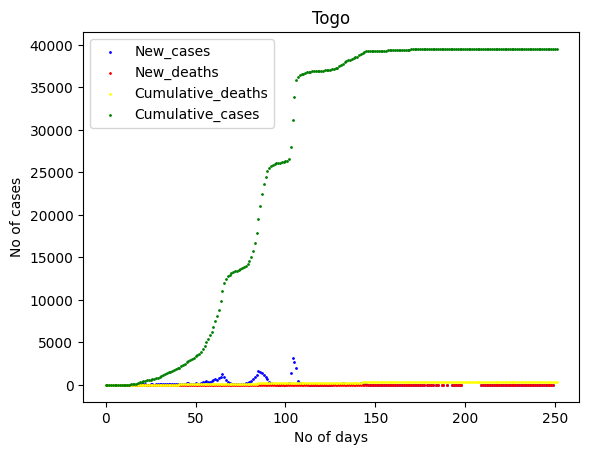

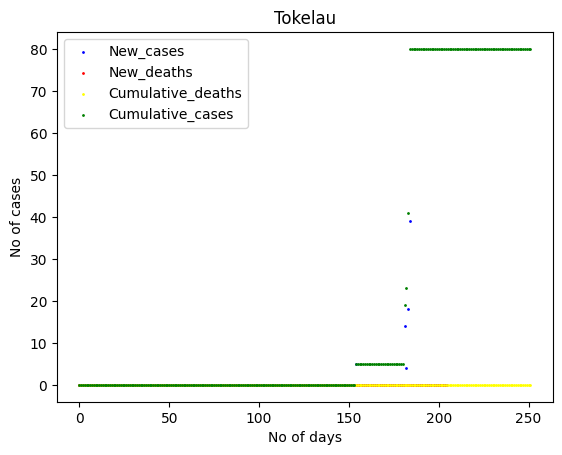

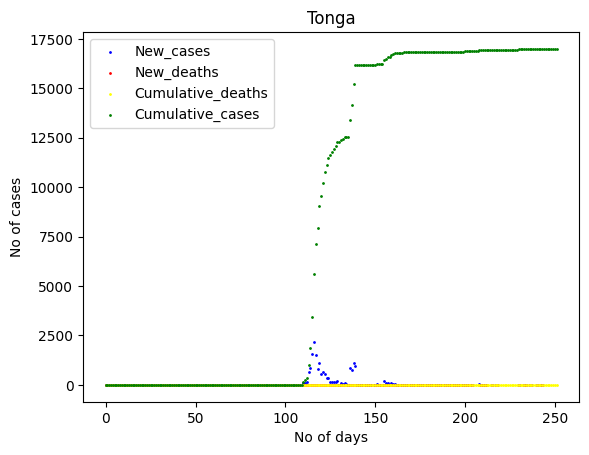

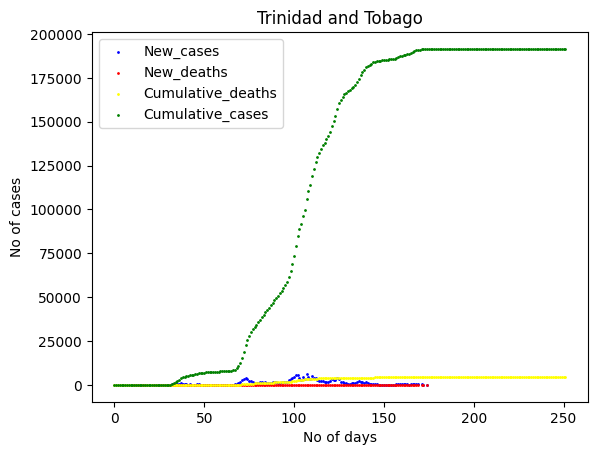

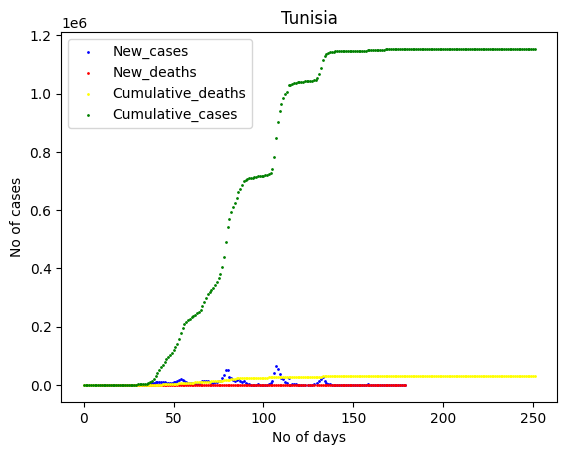

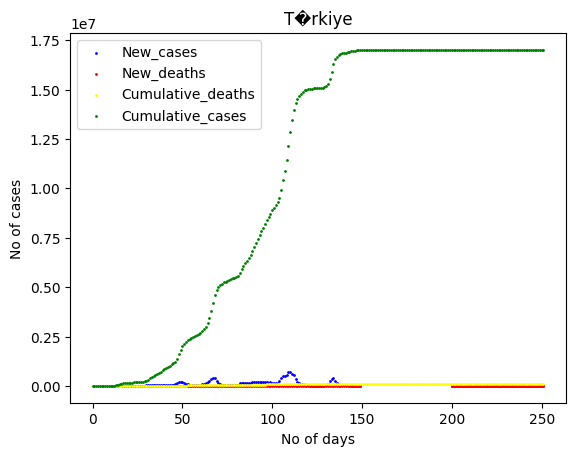

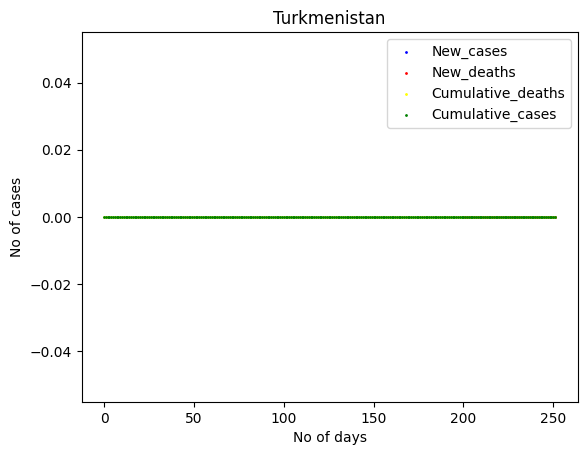

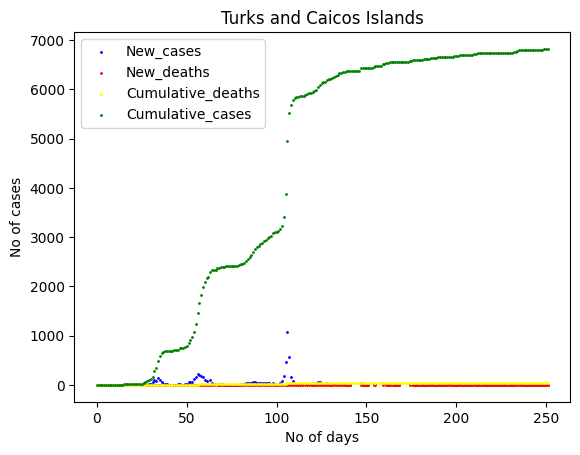

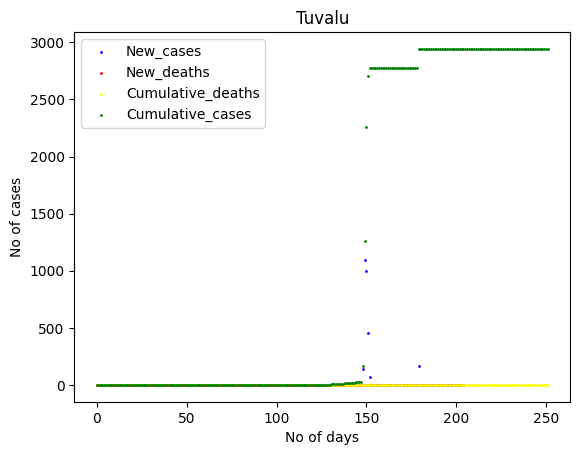

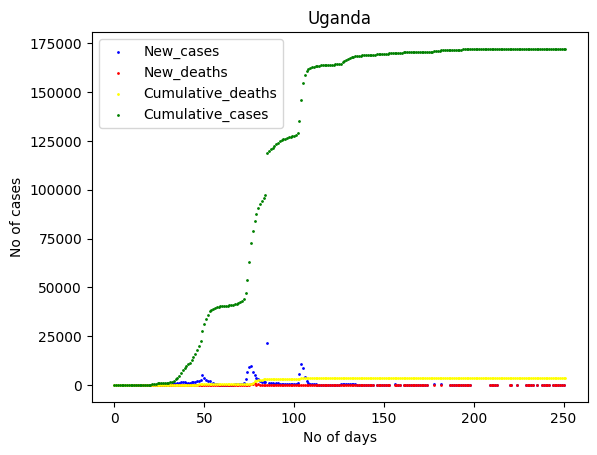

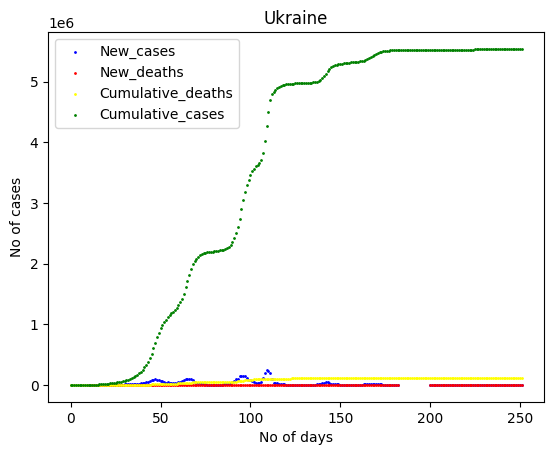

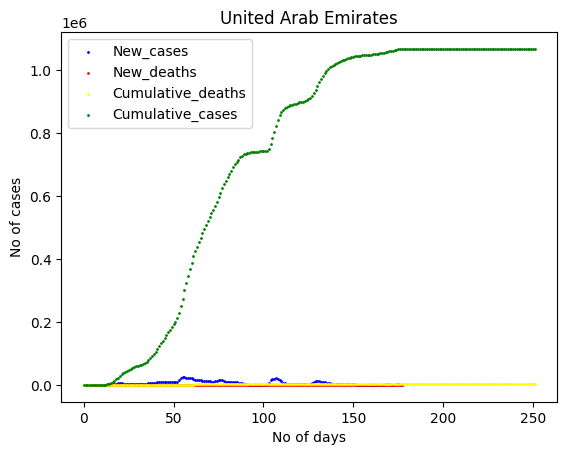

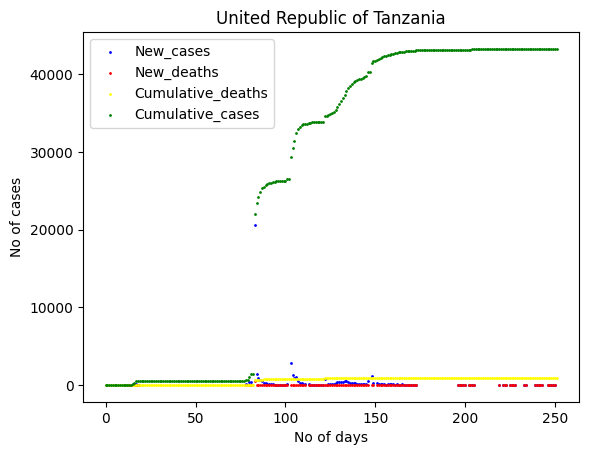

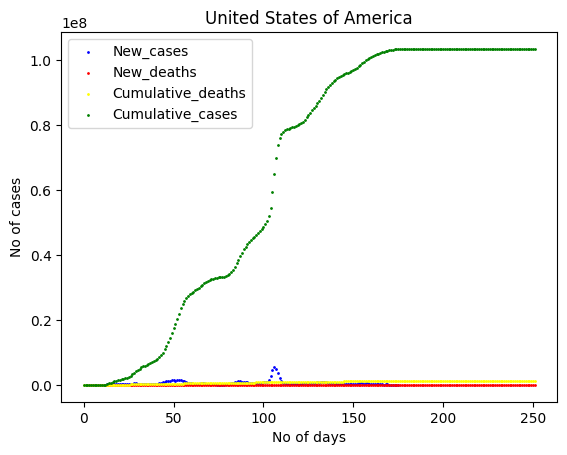

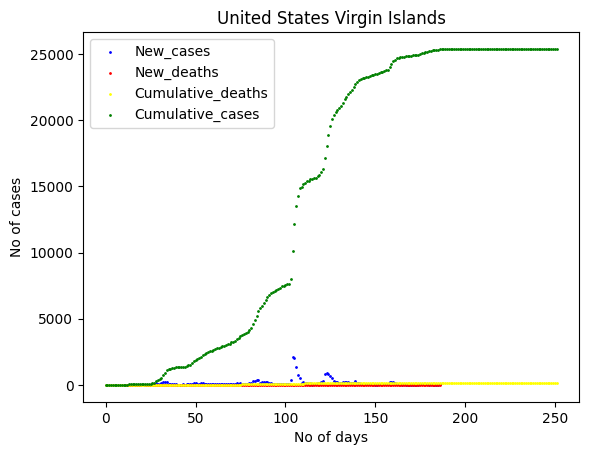

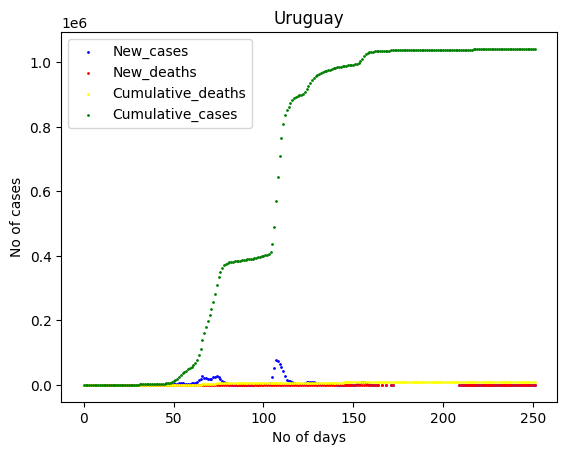

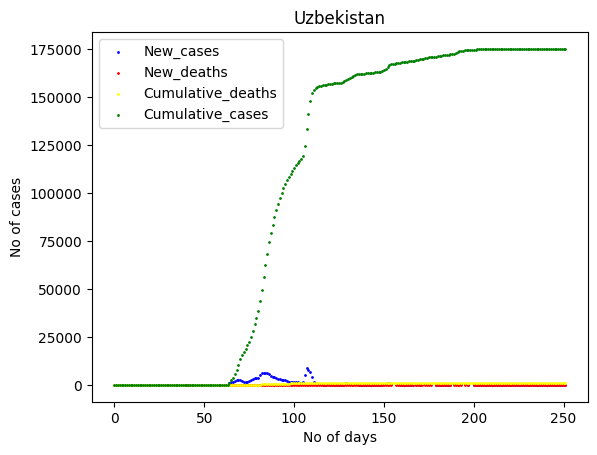

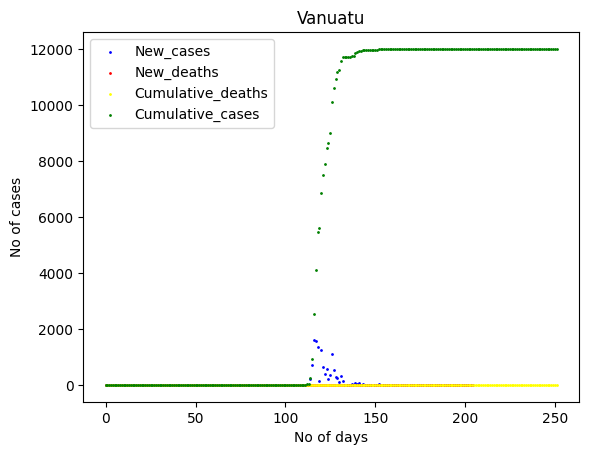

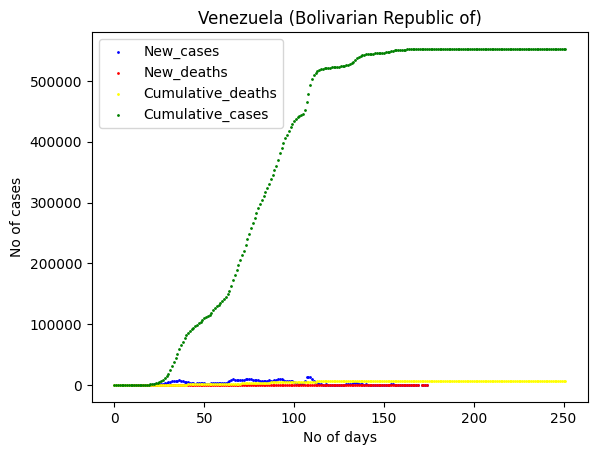

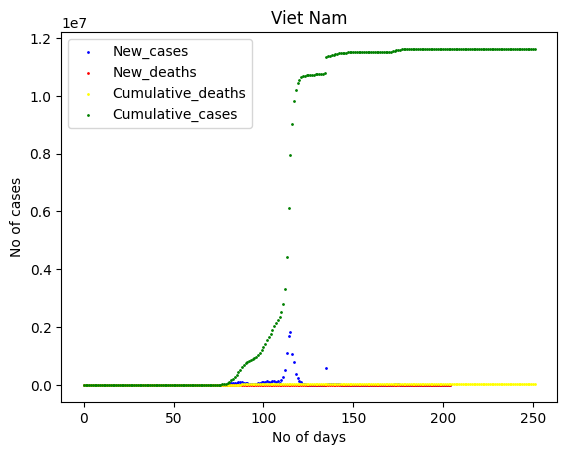

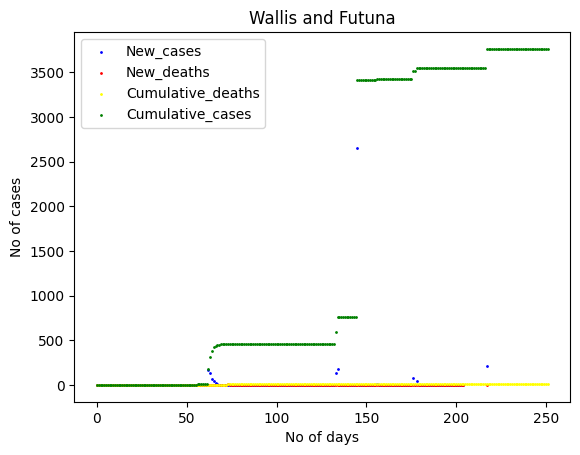

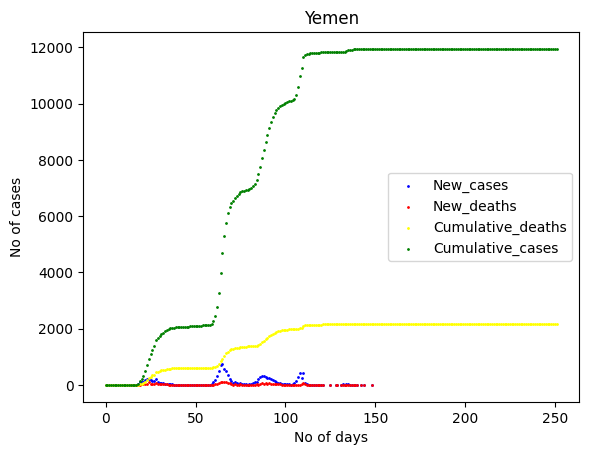

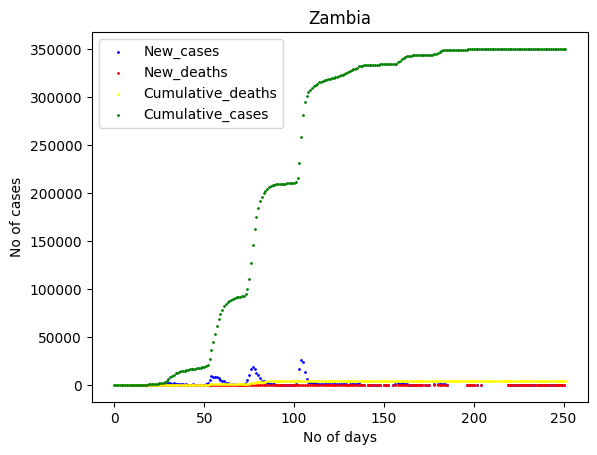

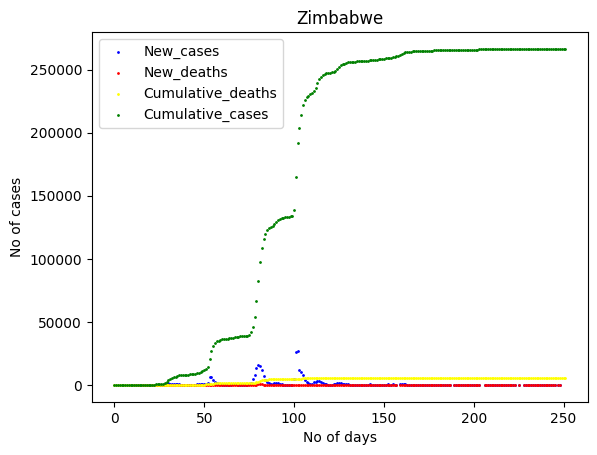

In [15]:
print("\nThe graphs of all countries are :\n")
for i in range(0,len(countries)):
    c=df2[df2['Country']==countries[i]].reset_index()
    plt.scatter(np.arange(0,len(c)),c['New_cases'],color='blue',label='New_cases',s=1) #s is used to decrease thickness of graph lines
    plt.scatter(np.arange(0,len(c)),c['New_deaths'],color='red',label='New_deaths',s=1)
    plt.scatter(np.arange(0,len(c)),c['Cumulative_deaths'],color='yellow',label='Cumulative_deaths',s=1)
    plt.scatter(np.arange(0,len(c)),c['Cumulative_cases'],color='green',label='Cumulative_cases',s=1)
    plt.title(countries[i])
    plt.xlabel("No of days")
    plt.ylabel("No of cases")
    plt.legend()
    plt.show()